# **🛒🏬Walmart - Confidence Interval and CLT**

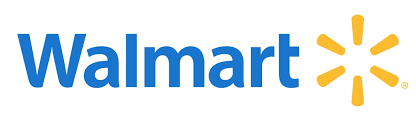

## **🛒What is Walmart?**
   **Walmart**, founded in 1962 and headquartered in Bentonville, Arkansas, is a global retail leader. It operates in over 19 countries and serves millions of customers daily through its hypermarkets, discount stores, and e-commerce platforms. Known for its commitment to "Everyday Low Prices," Walmart focuses on affordability, innovation, and sustainability, making it a go-to destination for a wide range of products.

## **🎯Project Goal**
The goal of this analysis is to help Walmart’s management understand customer purchasing behavior, particularly focusing on how gender, marital status, and age affect spending habits. These insights will help Walmart improve business decisions and enhance customer satisfaction.

## 📋**Data Overview**
This dataset contains information about customers and their purchase behaviors, including demographic details and transaction amounts.

## **🔍Exploratory Data Analysis**

In [95]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm

In [96]:
# loading the dataset
url = "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094"
df = pd.read_csv(url)

### **🧮Analysing Basic Metrics**

In [3]:
# Top 5 rows of the dataframe
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [94]:
#Checking Shape of dataset
df.shape

(550068, 10)

In [97]:
#Checking dataset stucture and features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


###❓**Missing Value Analysis**

In [6]:
#Checking missing values
df.isnull().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category,0
Purchase,0


**💡Insight**:
  * **Shape**: The dataset contains **550068 rows** and **10 columns**.
  * **Data Types**: There are 5 integer attributes and 5 string attributes.
  * **Attribute Names:** User_ID, Product_ID, Gender, Age, Occupation, City_Category, Stay_In_Current_City_Years, Marital_Status, Product_Category, Purchase.
  * The dataset has **no missing values**.



### **🔀Converting Column Data Types**

In [7]:
# Convert all columns except purchase to 'category' data type
for i in df.columns[:-1]:
    df[i] = df[i].astype('category')
#checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  category
 1   Product_ID                  550068 non-null  category
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  category
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  category
 9   Purchase                    550068 non-null  int64   
dtypes: category(9), int64(1)
memory usage: 10.3 MB


### **📝Statistical Summary**

In [8]:
#Numerical Data Summary Statistics
df.describe()

,Purchase
count,550068.000000
mean,9263.968713
std,5023.065394
min,12.000000
25%,5823.000000
50%,8047.000000
75%,12054.000000
max,23961.000000


**💡Insight**:
The purchase amounts vary widely, from 12 dollars to 23,961 dollars. With a median of 8,047 dollars, which is less than the average of 9,264 dollars, the distribution is right-skewed. This indicates that a few high-value purchases are inflating the average.

In [9]:
#Satistical summary of object type columns
df.describe(include = 'category')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category
count,550068,550068,550068,550068,550068,550068,550068,550068,550068
unique,5891,3631,2,7,21,3,5,2,20
top,1001680,P00265242,M,26-35,4,B,1,0,5
freq,1026,1880,414259,219587,72308,231173,193821,324731,150933


**💡Insight**:
   
**1. User_ID:**
   * There are 5,891 unique users out of 550,068 transactions. Many customers are buying multiple products.

**2. Product_ID**:
   * There are 3,631 unique products. The top seller is P00265242 with 1,880 units sold.

**3. Gender**:
  * About 75% of the transactions are by males, showing a big difference in shopping habits between men and women during Black Friday.

**4. Age**:
  * The 26-35 age group made the most purchases (219,587 transactions). Young adults are a major part of the customer base.

**5. Stay_In_Current_City_Years**:

  * Customers who have lived in their city for 1 year made the most transactions (193,821). Newer residents seem to shop more.

**6. Marital_Status**:

59% of transactions are by unmarried customers, and 41% by married customers. They have different shopping behaviors.

### **👀 checking for duplicates**


In [10]:
#Checking for duplicates
df.duplicated().value_counts()

,count
False,550068


**💡 Insights:**

   * No duplicates found in dataset

## **🧐Detect Outliers**

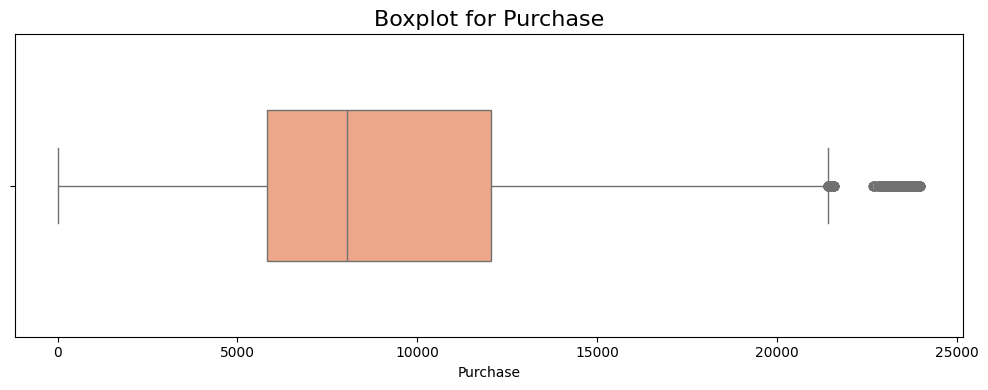

In [11]:
# Creating a boxplot for the 'Purchase' column
continuous_vars = ['Purchase']

for var in continuous_vars:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=var, data=df, color='#FFA07A', width=0.5)
    plt.title(f'Boxplot for {var}', fontsize=16)
    plt.xlabel(var)
    plt.tight_layout()
    plt.show()


In [12]:
# Calculate quartiles and IQR
Q1 = np.percentile(df[var], 25)
Q3 = np.percentile(df[var], 75)
IQR = Q3 - Q1

# Upper and lower bounds for outliers
upper_bound = Q3 + (1.5 * IQR)
lower_bound = Q1 - (1.5 * IQR)
# Identify outliers
upper_outliers_df = df[df[var] > upper_bound]
lower_outliers_df = df[df[var] < lower_bound]
# Count of outliers
upper_count = len(upper_outliers_df)
lower_count = len(lower_outliers_df)
total_count = upper_count + lower_count

print(f"\nVariable: {var}")
print(f"Upper Bound: {upper_bound}, Lower Bound: {lower_bound}")
print(f"Upper Outliers: {upper_count}, Lower Outliers: {lower_count}, Total Outliers: {total_count}")

# Clip data between 5th and 95th percentiles
lower_clip = df[var].quantile(0.05)
upper_clip = df[var].quantile(0.95)
df[var] = np.clip(df[var], lower_clip, upper_clip)

# summary of the clipped data
print(df.describe())



Variable: Purchase
Upper Bound: 21400.5, Lower Bound: -3523.5
Upper Outliers: 2677, Lower Outliers: 0, Total Outliers: 2677
            Purchase
count  550068.000000
mean     9256.710489
std      4855.947166
min      1984.000000
25%      5823.000000
50%      8047.000000
75%     12054.000000
max     19336.000000


## **📊Non graphical analysis**

In [13]:
# List of categorical columns
categorical_columns = ['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category']
value_counts_dict = {col: df[col].value_counts() for col in categorical_columns}


In [14]:
unique_values_dict = {}
# Using a for loop to get unique values for each categorical column
for col in categorical_columns:
    unique_values_dict[col] = df[col].unique()

# Access or use the unique values as needed
unique_values_dict



{'User_ID': [1000001, 1000002, 1000003, 1000004, 1000005, ..., 1004588, 1004871, 1004113, 1005391, 1001529]
 Length: 5891
 Categories (5891, int64): [1000001, 1000002, 1000003, 1000004, ..., 1006037, 1006038, 1006039, 1006040],
 'Product_ID': ['P00069042', 'P00248942', 'P00087842', 'P00085442', 'P00285442', ..., 'P00375436', 'P00372445', 'P00370293', 'P00371644', 'P00370853']
 Length: 3631
 Categories (3631, object): ['P00000142', 'P00000242', 'P00000342', 'P00000442', ..., 'P0099642',
                             'P0099742', 'P0099842', 'P0099942'],
 'Gender': ['F', 'M']
 Categories (2, object): ['F', 'M'],
 'Age': ['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25']
 Categories (7, object): ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'],
 'Occupation': [10, 16, 15, 7, 20, ..., 18, 5, 14, 13, 6]
 Length: 21
 Categories (21, int64): [0, 1, 2, 3, ..., 17, 18, 19, 20],
 'City_Category': ['A', 'C', 'B']
 Categories (3, object): ['A', 'B', 'C'],
 'Stay_In_Current_City

In [15]:
# To find number of unique values
df[['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category']].nunique()


,0
User_ID,5891
Product_ID,3631
Gender,2
Age,7
Occupation,21
City_Category,3
Stay_In_Current_City_Years,5
Marital_Status,2
Product_Category,20


## **📊Visual Analysis-Univariate & Bivariate**

### **Univariate Plots - distributions**

**For Continuous Variable**

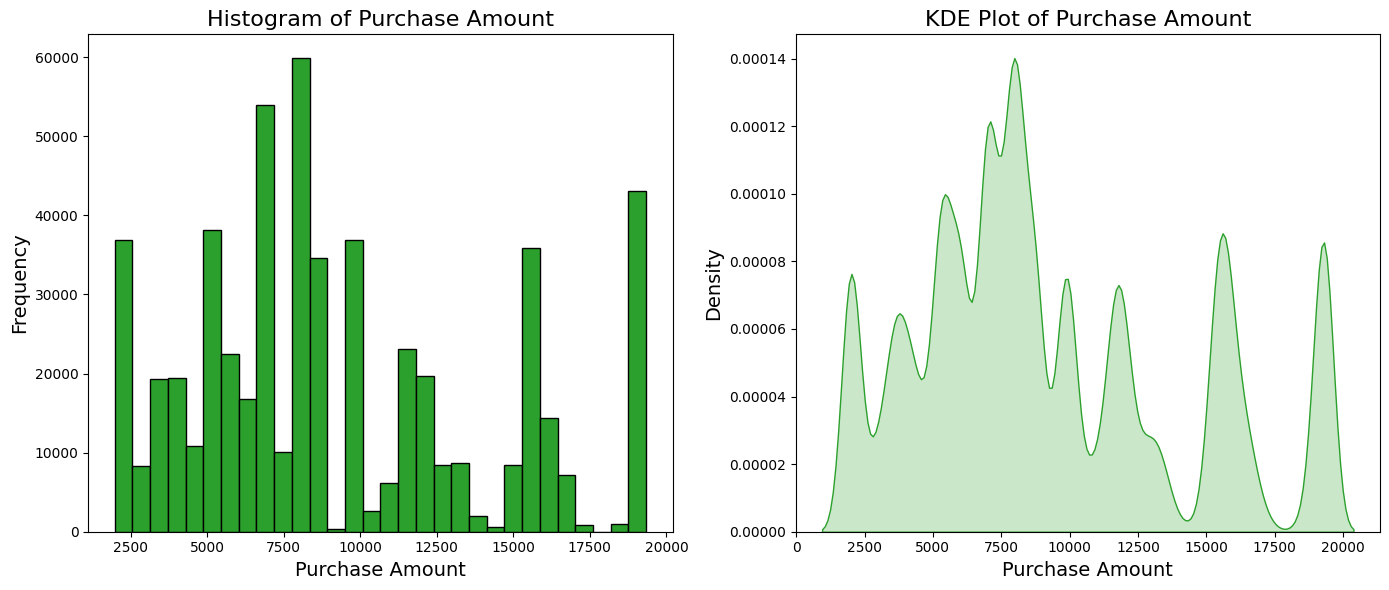

In [16]:
#figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Histogram for Purchase amount
axes[0].hist(df['Purchase'], bins=30, color='#2ca02c', edgecolor='black')
axes[0].set_title('Histogram of Purchase Amount', fontsize=16)
axes[0].set_xlabel('Purchase Amount', fontsize=14)
axes[0].set_ylabel('Frequency', fontsize=14)

# KDE Plot for Purchase amount
sns.kdeplot(df['Purchase'], fill=True, color='#2ca02c', ax=axes[1])
axes[1].set_title('KDE Plot of Purchase Amount', fontsize=16)
axes[1].set_xlabel('Purchase Amount', fontsize=14)
axes[1].set_ylabel('Density', fontsize=14)


plt.tight_layout()
plt.show()



**💡 Insights**:

**Histogram of Purchase Amount:**
 * Most purchases are concentrated between 2,500 and 10,000, with a significant peak around 7,500.

 * The distribution has multiple peaks indicating different spending groups.

**KDE Plot of Purchase Amount:**
 * The KDE plot confirms the multiple spending patterns, with smooth peaks around the same ranges observed in the histogram.

 * The density curve provides a clearer view of the spending patterns and helps in identifying the most common purchase amounts.

**For Categorical Variables**

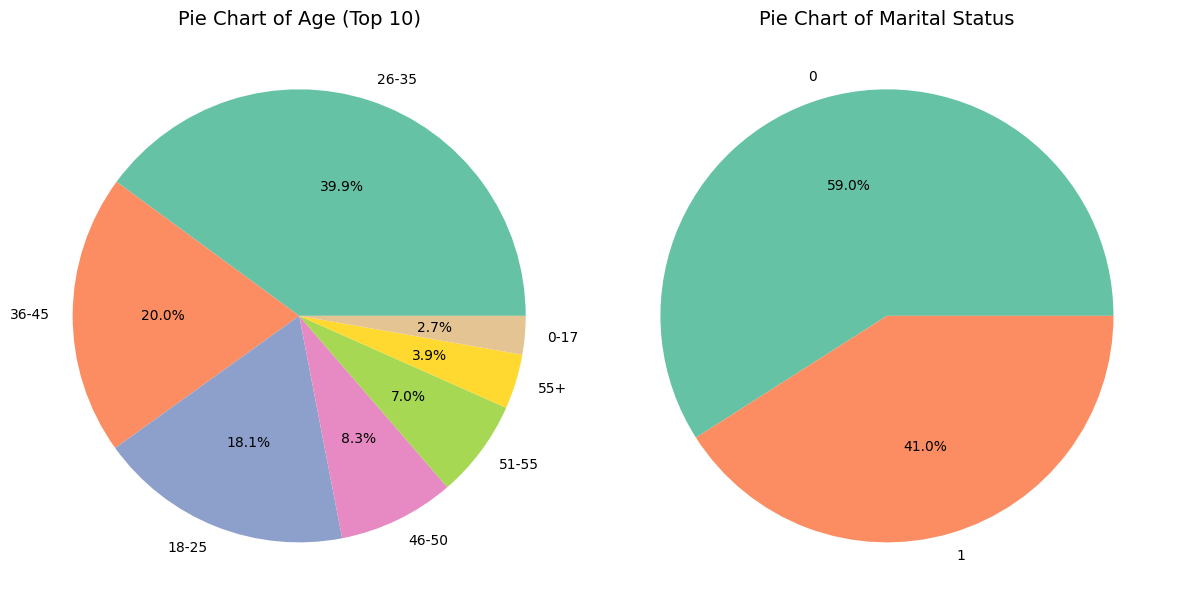

In [17]:
#subplots for pie charts
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Pie Chart of Age Distribution
age_counts = df['Age'].value_counts().nlargest(10)
age_counts.plot.pie(ax=axes[0], autopct='%1.1f%%', colors=sns.color_palette('Set2', len(age_counts)))
axes[0].set_title('Pie Chart of Age (Top 10)', fontsize=14)
axes[0].set_ylabel('')

# Pie Chart of Marital Status Distribution
marital_counts = df['Marital_Status'].value_counts()
marital_counts.plot.pie(ax=axes[1], autopct='%1.1f%%', colors=sns.color_palette('Set2', len(marital_counts)))
axes[1].set_title('Pie Chart of Marital Status', fontsize=14)
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()


**💡 Insights:**

**Age Distribution**:
* **Primary Age Group**: 26-35 years old (39.9%) is the largest group.

* **Other Significant Groups**: 36-45 (20.0%) and 18-25 (18.1%).

**Marital Status**:
* **Unmarried Majority**: 59.0% are unmarried, 41.0% are married.

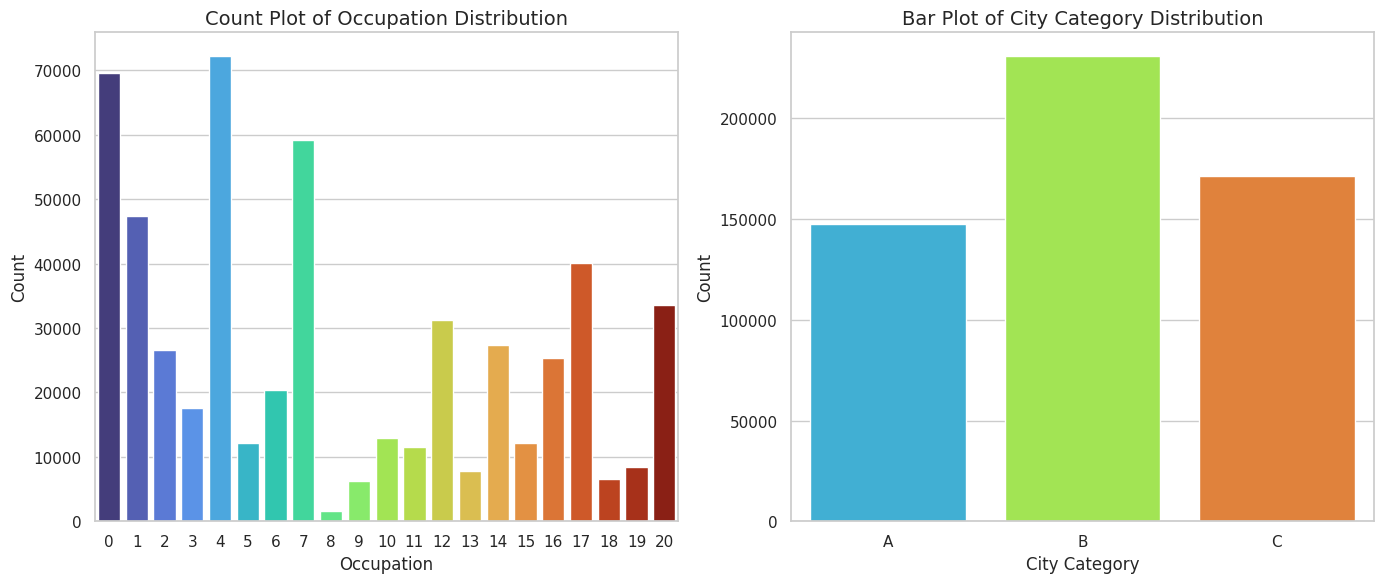

In [18]:
sns.set(style="whitegrid")

#subplots for bar plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

#Count Plot of Occupation
sns.countplot(ax=axes[0], x='Occupation', hue='Occupation', data=df, palette='turbo', legend=False)
axes[0].set_title('Count Plot of Occupation Distribution', fontsize=14)
axes[0].set_xlabel('Occupation', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)

#Count Plot of City Category
sns.countplot(ax=axes[1], x='City_Category', hue='City_Category', data=df, palette='turbo')
axes[1].set_title('Bar Plot of City Category Distribution', fontsize=14)
axes[1].set_xlabel('City Category', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)

plt.tight_layout()
plt.show()



**💡 Insights**:

**Occupation Distribution**:
* **Top Occupations**: Occupations 0, 4, and 7 have the highest counts, around 70,000 and 60,000 respectively.

* **Less Common Occupations**: The rest have lower counts, 8, 9, 10, 11, and 18 have fewer than 10,000 customers.

**City Category Distribution**
* **Category B**: Over 200,000 customers, the most frequent shoppers.

* **Category C**: Around 150,000 customers, a significant presence.

* **Category A**: Just under 150,000 customers, the fewest among the three categories.

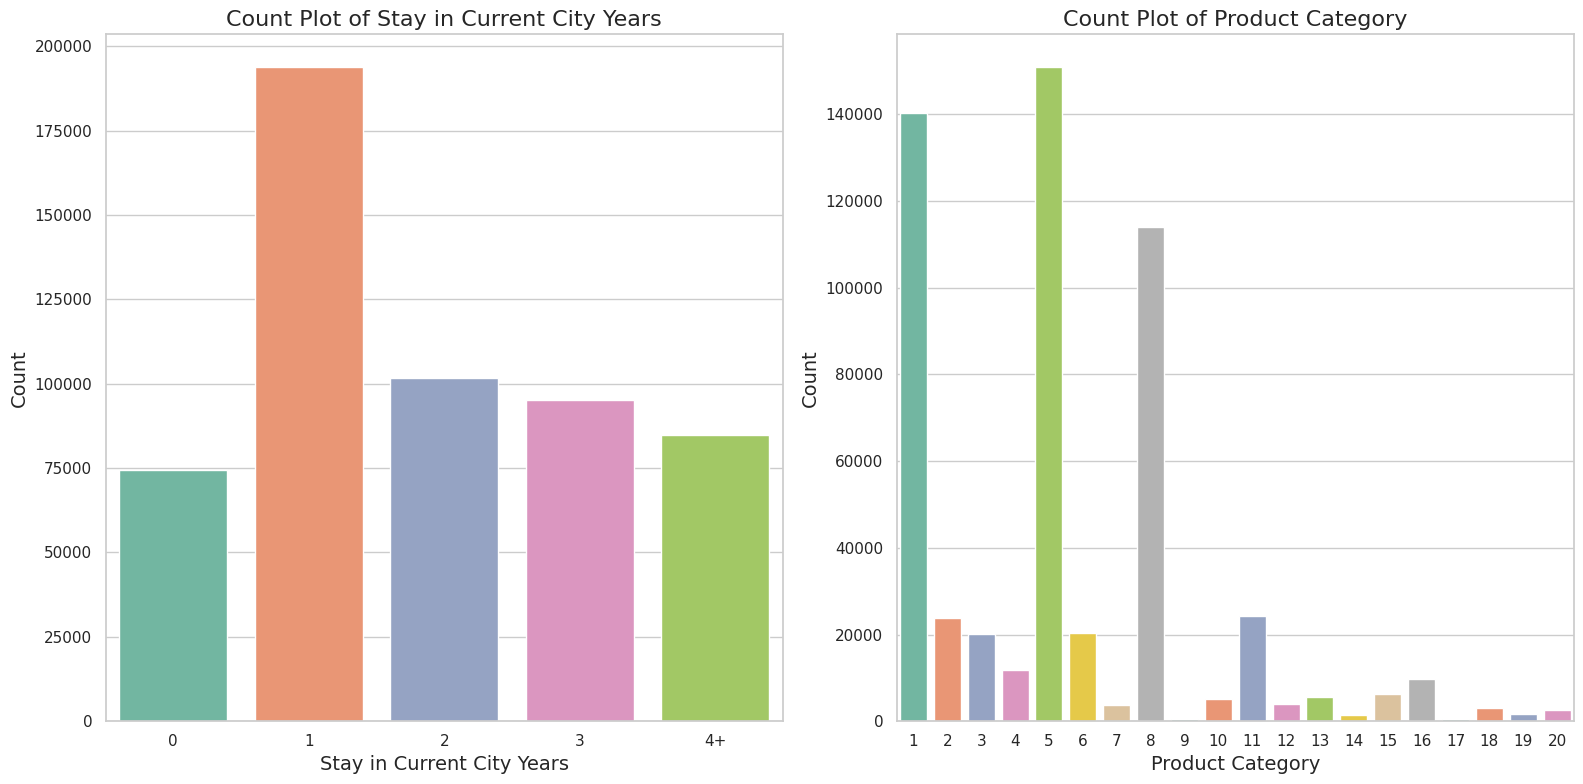

In [19]:
#subplots for the two categorical variables
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Count Plot for Stay in Current City Years
sns.countplot(ax=axes[0], x='Stay_In_Current_City_Years', hue='Stay_In_Current_City_Years', data=df, palette='Set2', legend=False)
axes[0].set_title('Count Plot of Stay in Current City Years', fontsize=16)
axes[0].set_xlabel('Stay in Current City Years', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)

# Count Plot for Product Category
sns.countplot(ax=axes[1], x='Product_Category', hue='Product_Category', data=df, palette='Set2', legend=False)
axes[1].set_title('Count Plot of Product Category', fontsize=16)
axes[1].set_xlabel('Product Category', fontsize=14)
axes[1].set_ylabel('Count', fontsize=14)


plt.tight_layout()
plt.show()




**💡 Insights**:
**Stay in Current City Years**
* Most people have lived in their current city for 1 year. The next largest group has stayed for 2 years. Fewer people have lived in their city for 3 years or more than 4 years. The smallest group consists of those who have just moved (0 years).

**Product Category**
* Product categories 1 and 5 are the most popular. Category 8 follows with a notable number of products. Other categories have significantly fewer products compared to these three.

### **Bivariate Plots-Analyze Relationships**

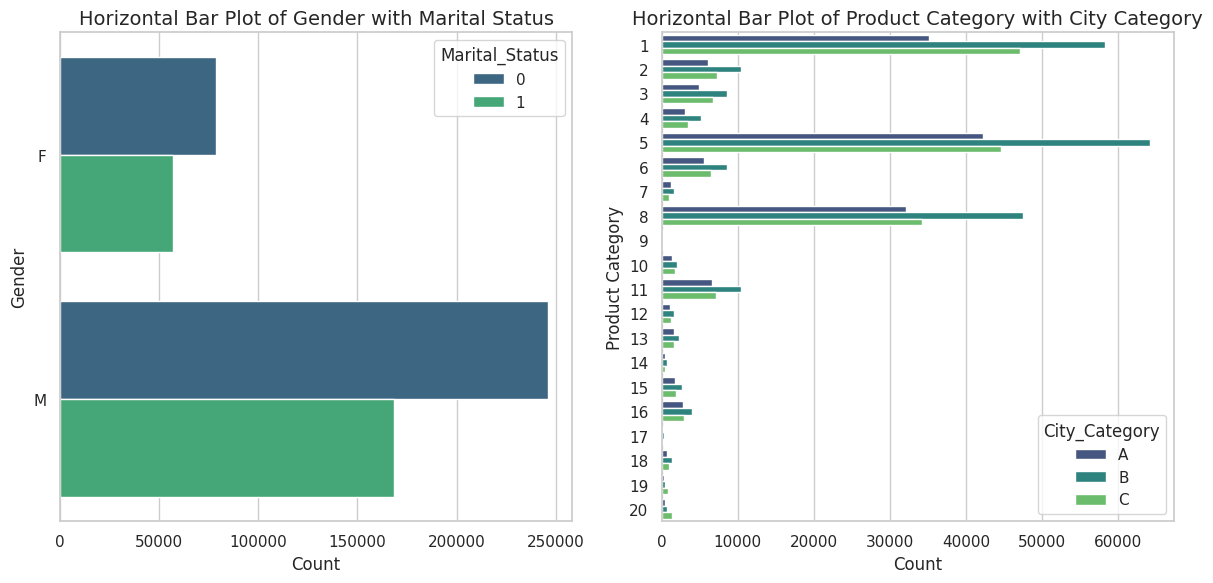

In [20]:
#subplots for horizontal bar plots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Horizontal Bar Plot of Gender with Marital_Status
sns.countplot(y='Gender', hue='Marital_Status', data=df, palette='viridis', ax=axes[0])
axes[0].set_title('Horizontal Bar Plot of Gender with Marital Status', fontsize=14)
axes[0].set_xlabel('Count', fontsize=12)
axes[0].set_ylabel('Gender', fontsize=12)

#Horizontal Bar Plot of Product Category with City_Category
sns.countplot(y='Product_Category', hue='City_Category', data=df, palette='viridis', ax=axes[1])
axes[1].set_title('Horizontal Bar Plot of Product Category with City Category', fontsize=14)
axes[1].set_xlabel('Count', fontsize=12)
axes[1].set_ylabel('Product Category', fontsize=12)

plt.tight_layout()
plt.show()



**💡 Insights**:

**Gender and Marital Status**:
 * **More Males than Females**: There are more males than females in both unmarried and married categories.

* **Unmarried Males Lead**: Unmarried males have the highest count.

**Product Category and City Category**:
* **City Category C Leads**: City category C shows the highest counts across most product categories.

* **Popular Product Categories**: Product categories 1, 5, and 8 have the highest counts.

**a. What products are different age groups buying?**

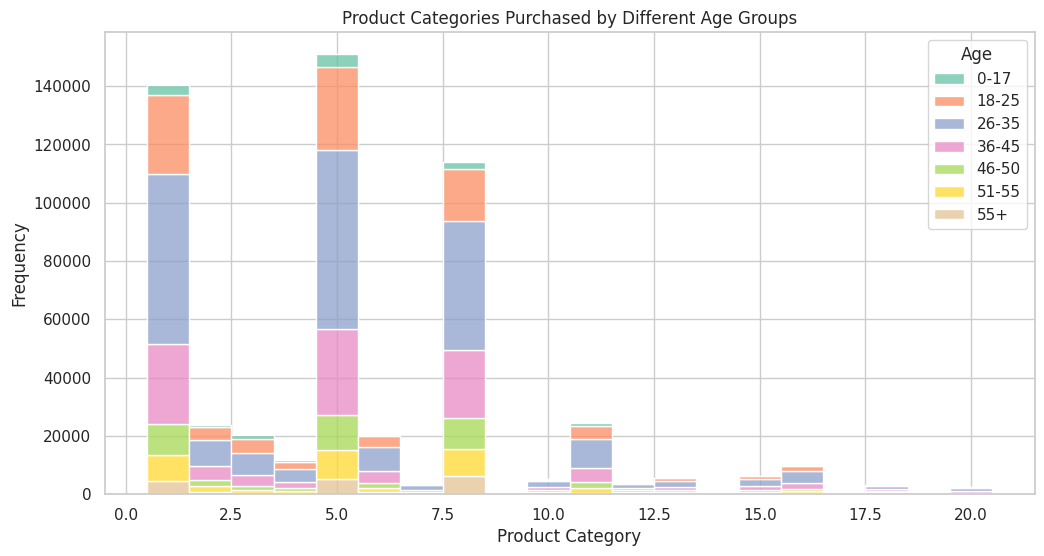

In [21]:
# Histogram to explore product categories by age groups
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Product_Category', hue='Age', multiple='stack', palette='Set2', bins=20)
plt.title('Product Categories Purchased by Different Age Groups')
plt.xlabel('Product Category')
plt.ylabel('Frequency')
plt.show()





**💡 Insights:**

**Popular Categories:** The most purchased product categories are **1.0, 5.0,** and **8.0**.

**Top Age Group**: The **age group 26-35** buys the most, especially in those popular categories. Followed by the age group 18-25, which also has a significant number of purchases.

**Less Active Buyers**: Younger (0-17) and older age groups (55+) buy less overall.

**Low Interest Categories**: Categories beyond 10.0 see fewer purchases across all age groups.

**b. Are there preferred product categories for different genders?**

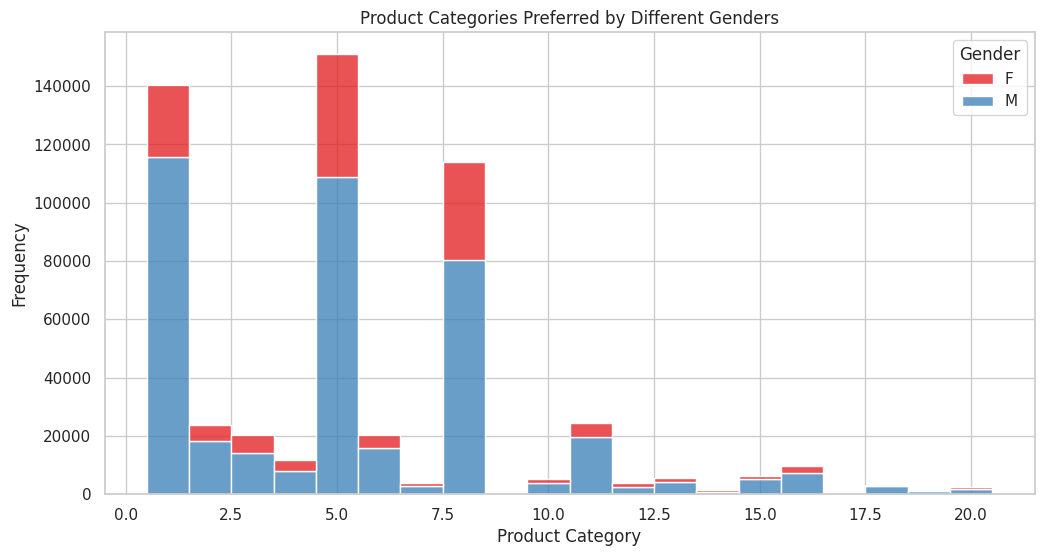

In [22]:
# Histogram to explore product categories by gender
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Product_Category', hue='Gender', multiple='stack', palette='Set1', bins=20)
plt.title('Product Categories Preferred by Different Genders')
plt.xlabel('Product Category')
plt.ylabel('Frequency')
plt.show()


**💡 Insights**:

**Popular Categories**: Product categories **1.0, 5.0**, and **8.0 are the most preferred**.

**Top Category**: Category **5.0** is the **highest** overall.

**Gender Comparison**: **Males** show a **higher** preference for most categories compared to females.

**Less Preferred Categories**: Categories beyond 10.0 have lower preferences.

###**Multivariate analysis**

**Is there a relationship between age, marital status, and the amount spent?**

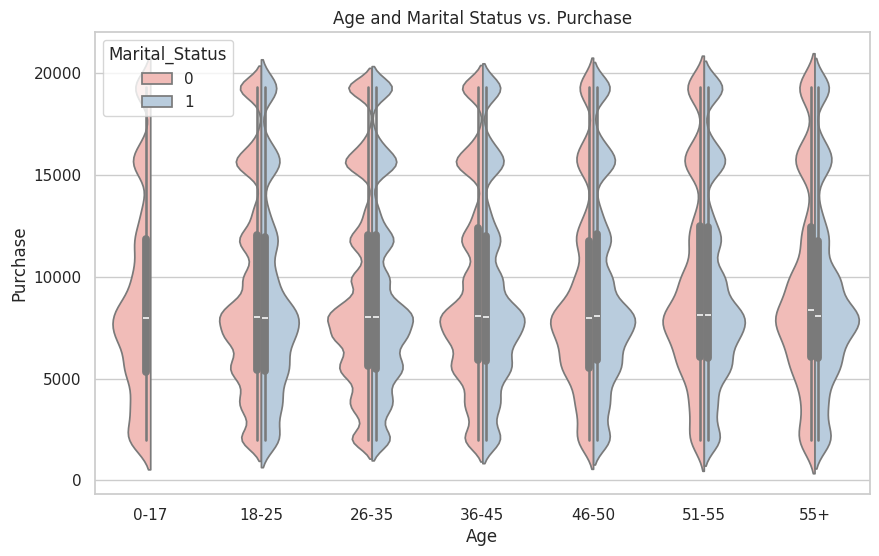

In [23]:
# Violin plot with the correct column names
plt.figure(figsize=(10, 6))
sns.violinplot(x='Age', y='Purchase', hue='Marital_Status', data=df, split=True, palette='Pastel1')
plt.title('Age and Marital Status vs. Purchase')
plt.show()

**💡 Insights**:

**Varied Spending**: Younger age groups (0-17, 18-25) have more varied spending amounts.

**Consistent Median**: Median spending is fairly consistent across ages.

**Frequent Purchases**: Age groups 26-35 and 36-45 show frequent purchases.

**Marital Status Impact**: Marital status affects spending patterns across ages.

## **📊 Data Visualization**

##**Marital Status VS Purchase**

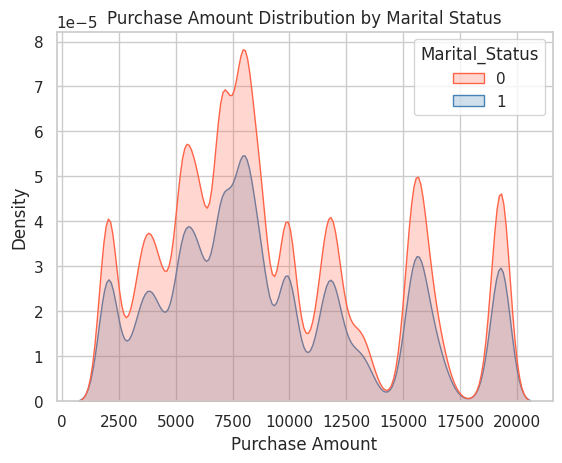

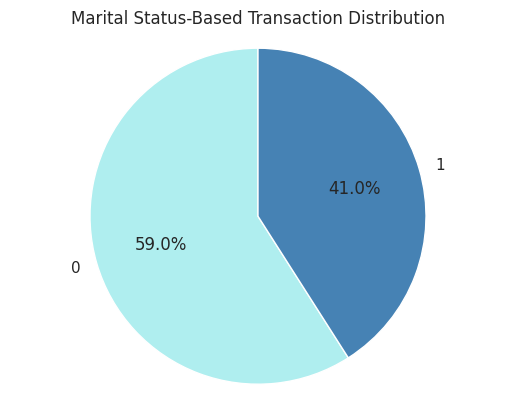

In [24]:
# Plot the density of purchase amounts for each marital status
sns.kdeplot(data=df, x='Purchase', hue='Marital_Status', fill=True, palette=['#FF6347', '#4682B4'])
plt.title('Purchase Amount Distribution by Marital Status')
plt.xlabel('Purchase Amount')
plt.ylabel('Density')
plt.show()

# count of transactions for each marital status
marital_status_counts = df['Marital_Status'].value_counts()

# Plot the pie chart
colors = ['#AFEEEF', '#4682B4']
plt.pie(marital_status_counts, labels=marital_status_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Marital Status-Based Transaction Distribution')
plt.axis('equal')
plt.show()


**💡 Insights**:

**Density Plot**:
* **Non-Normal Distribution**: The purchase amounts for both married and unmarried customers do not follow a normal distribution.

* **Similar Spending Patterns**: Both groups have similar spending behaviors as indicated by the density curves.

**Pie Chart**:
* **Customer Distribution**:

The pie chart shows that 59% of customers are unmarried (status 0), and 41% are married (status 1).

**a. Confidence Intervals for Average Amount Spent by Married and Unmarried Individuals**

Confidence Interval for Entire Dataset by Marital Status:
   Marital_Status                                      CI     Lower_CI  \
0               0  (9248.616353737028, 9283.198884105985)  9248.616354   
1               1  (9240.460315792989, 9281.888832371758)  9240.460316   

      Upper_CI      Width  
0  9283.198884  34.582530  
1  9281.888832  41.428517  


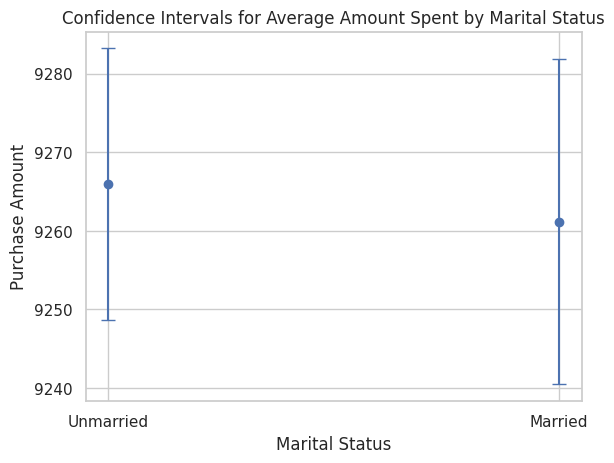

In [106]:
# Define the compute_ci() function
def compute_ci(series, confidence=0.95):
    mean = np.mean(series)
    sem = stats.sem(series)  # Standard error of the mean
    margin_of_error = sem * stats.t.ppf((1 + confidence) / 2., len(series) - 1)
    return mean - margin_of_error, mean + margin_of_error
# Calculate the mean purchase amount for each marital status
mean_purchase_marital = df.groupby('Marital_Status', observed=True)['Purchase'].mean().reset_index()
mean_purchase_marital.columns = ['Marital_Status', 'Mean_Purchase']

# Compute confidence interval for each marital status
ci_marital = df.groupby('Marital_Status', observed=True)['Purchase'].apply(compute_ci).reset_index()
ci_marital.columns = ['Marital_Status', 'CI']
ci_marital[['Lower_CI', 'Upper_CI']] = pd.DataFrame(ci_marital['CI'].tolist(), index=ci_marital.index)
ci_marital['Width'] = ci_marital['Upper_CI'] - ci_marital['Lower_CI']

print("Confidence Interval for Entire Dataset by Marital Status:")
print(ci_marital)

# Plotting the confidence intervals
plt.errorbar(ci_marital['Marital_Status'].astype(str), (ci_marital['Lower_CI'] + ci_marital['Upper_CI'])/2,
             yerr=(ci_marital['Upper_CI'] - ci_marital['Lower_CI'])/2, fmt='o', capsize=5)
plt.title('Confidence Intervals for Average Amount Spent by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Purchase Amount')
plt.xticks(ticks=[0, 1], labels=['Unmarried', 'Married'])
plt.show()



 **i) Confidence Interval: Estimating Average Purchase per Transaction**

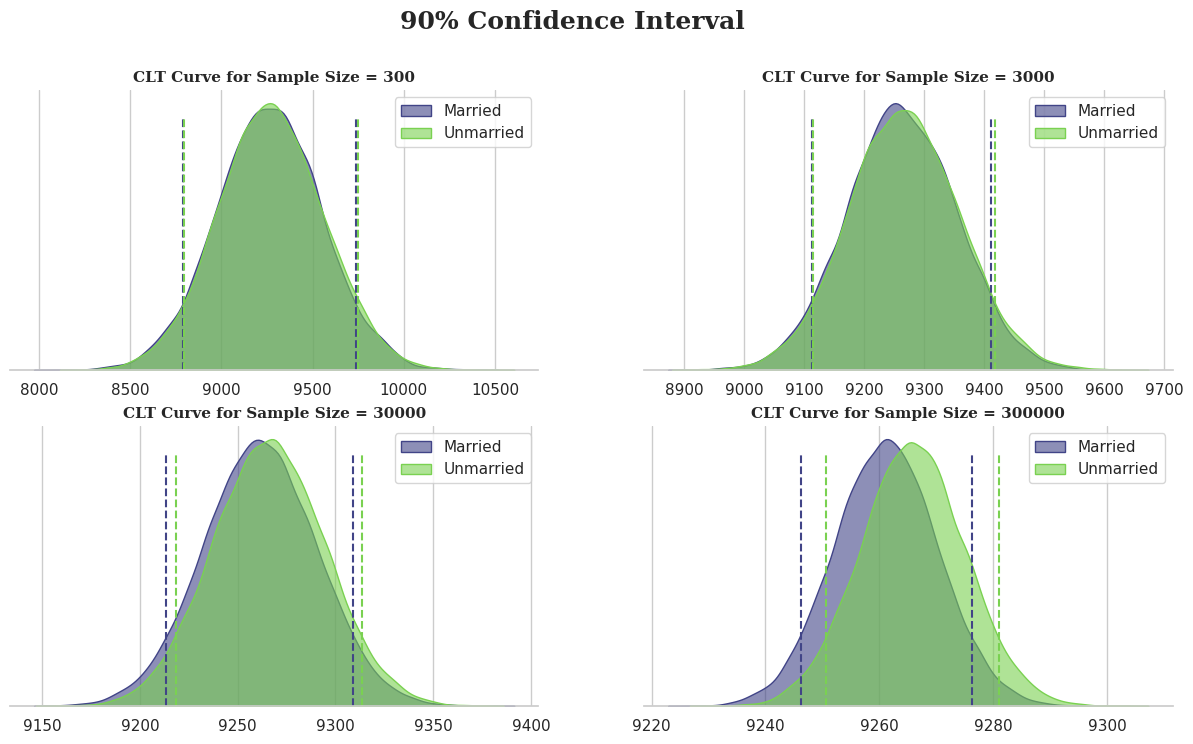

In [101]:
# Confidence Interval calculation function
def confidence_interval(data, ci):
    lower = np.percentile(data, (100 - ci) / 2)
    upper = np.percentile(data, 100 - (100 - ci) / 2)
    return lower, upper

# Plotting function
def plot(ci):
    # Setting the plot style
    fig = plt.figure(figsize=(15, 8))
    gs = fig.add_gridspec(2, 2)

    # Creating separate data frames based on Marital_Status: 0 = 'Unmarried', 1 = 'Married'
    df_married = df.loc[df['Marital_Status'] == 1, 'Purchase']
    df_unmarried = df.loc[df['Marital_Status'] == 0, 'Purchase']

    # Check if data exists for both categories
    if df_married.empty or df_unmarried.empty:
        print("Warning: No data for 'Married' or 'Unmarried' Marital Status.")
        return

    # Sample sizes and corresponding plot positions
    sample_sizes = [(300, 0, 0), (3000, 0, 1), (30000, 1, 0), (300000, 1, 1)]

    # Number of samples to be taken from the purchase amount
    bootstrap_samples = 20000

    married_samples = {}
    unmarried_samples = {}


    viridis = plt.cm.viridis
    married_color = viridis(0.2)
    unmarried_color = viridis(0.8)

    for size, x, y in sample_sizes:
        married_means = []
        unmarried_means = []

        for _ in range(bootstrap_samples):
            # Creating random samples of given size
            married_bootstrapped = np.random.choice(df_married, size=size)
            unmarried_bootstrapped = np.random.choice(df_unmarried, size=size)

            # Calculating mean of those samples
            married_sample_mean = np.mean(married_bootstrapped)
            unmarried_sample_mean = np.mean(unmarried_bootstrapped)

            # Appending the mean to the list
            married_means.append(married_sample_mean)
            unmarried_means.append(unmarried_sample_mean)

        # Storing the bootstrapped means
        married_samples[f'{ci}%_{size}'] = married_means
        unmarried_samples[f'{ci}%_{size}'] = unmarried_means

        # Creating a temporary dataframe for plotting kdeplot
        temp_df = pd.DataFrame(data={'married_means': married_means, 'unmarried_means': unmarried_means})

        # Plotting position
        ax = fig.add_subplot(gs[x, y])

        # Plotting kdeplot for married and unmarried with Viridis palette colors
        sns.kdeplot(data=temp_df, x='married_means', color=married_color, fill=True, alpha=0.6, ax=ax, label='Married')
        sns.kdeplot(data=temp_df, x='unmarried_means', color=unmarried_color, fill=True, alpha=0.6, ax=ax, label='Unmarried')

        # Calculating confidence intervals for the given confidence level (ci)
        m_range = confidence_interval(married_means, ci)
        u_range = confidence_interval(unmarried_means, ci)

        # Plotting confidence interval on the distribution
        for k in m_range:
            ax.axvline(x=k, ymax=0.9, color=married_color, linestyle='--')

        for k in u_range:
            ax.axvline(x=k, ymax=0.9, color=unmarried_color, linestyle='--')
        # Removing the axis lines
        for s in ['top', 'left', 'right']:
            ax.spines[s].set_visible(False)

        # Adjusting axis labels
        ax.set_yticks([])
        ax.set_ylabel('')
        ax.set_xlabel('')

        # Setting title for visual
        ax.set_title(f'CLT Curve for Sample Size = {size}', {'font': 'serif', 'size': 11, 'weight': 'bold'})

        plt.legend()

    # Setting title for the entire figure
    fig.suptitle(f'{ci}% Confidence Interval', font='serif', size=18, weight='bold')

    plt.show()


plot(90)


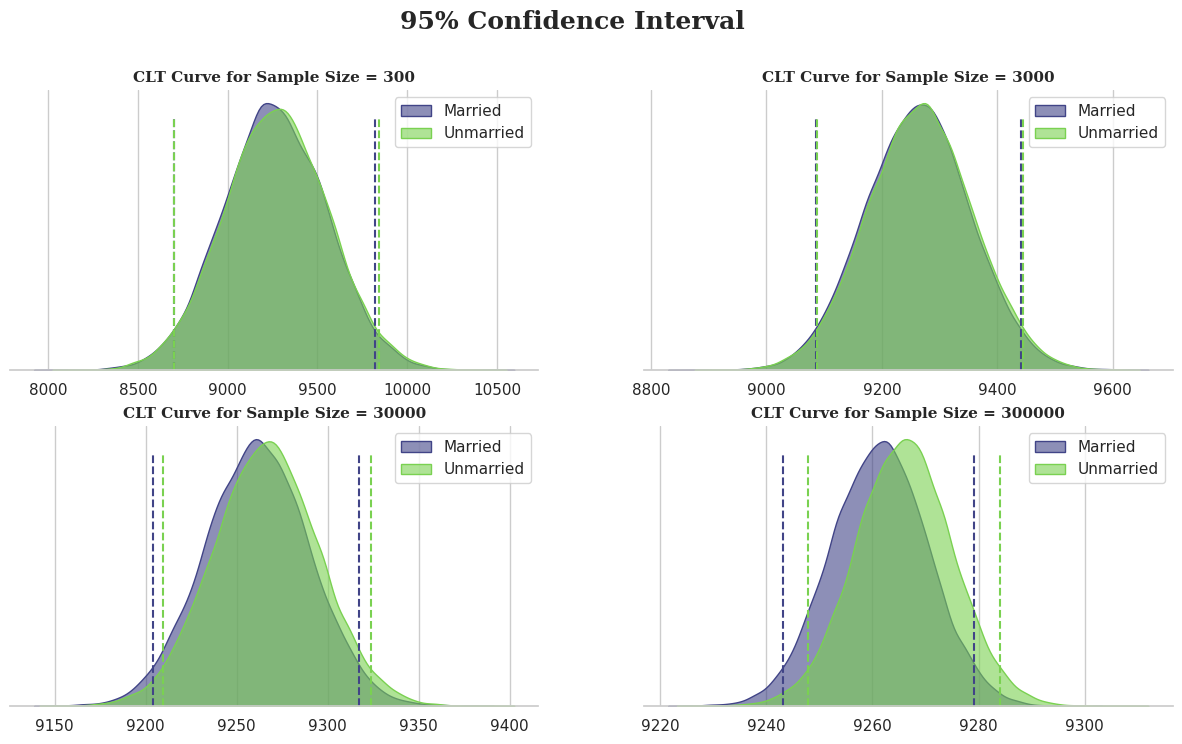

In [102]:
plot(95)

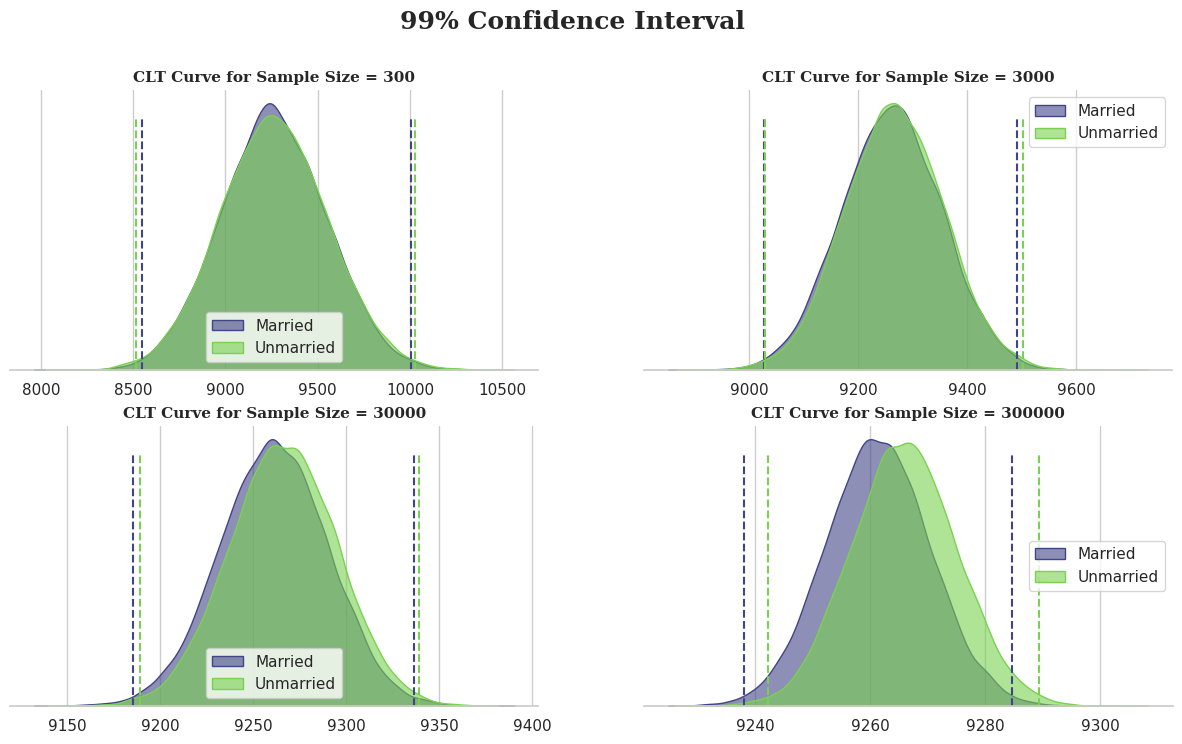

In [103]:
plot(99)

**ii) Confidence intervals of average married and unmarried customer spending overlapping?**

In [26]:
# Ensure 'Purchase' column contains numeric values
df['Purchase'] = pd.to_numeric(df['Purchase'], errors='coerce')

# Separate data for Marital_Status 0 and 1
df_status_0 = df[df['Marital_Status'] == 0]['Purchase'].dropna()
df_status_1 = df[df['Marital_Status'] == 1]['Purchase'].dropna()

# Ensure there is data available for both categories
if df_status_0.empty:
    print("The 'Marital_Status' 0 category has no data available.")
elif df_status_1.empty:
    print("The 'Marital_Status' 1 category has no data available.")
else:
    # Function to compute bootstrapped confidence intervals
    def bootstrap_ci(data, n_samples=1000, sample_size=1000, confidence=0.95):
        boot_means = [np.mean(np.random.choice(data, size=sample_size, replace=True)) for _ in range(n_samples)]
        mean = np.mean(boot_means)
        h = stats.sem(boot_means) * stats.t.ppf((1 + confidence) / 2., n_samples - 1)
        return mean, h

    # Sample sizes and confidence levels
    sample_sizes = [300, 3000, 30000]
    confidence_levels = [0.90, 0.95, 0.99]

    # Compute and display confidence intervals for each combination of sample size and confidence level
    for conf in confidence_levels:
        for size in sample_sizes:
            ci_status_0_mean, ci_status_0_h = bootstrap_ci(df_status_0, sample_size=size, confidence=conf)
            ci_status_1_mean, ci_status_1_h = bootstrap_ci(df_status_1, sample_size=size, confidence=conf)

            ci_status_0_lower, ci_status_0_upper = ci_status_0_mean - ci_status_0_h, ci_status_0_mean + ci_status_0_h
            ci_status_1_lower, ci_status_1_upper = ci_status_1_mean - ci_status_1_h, ci_status_1_mean + ci_status_1_h

            overlap = not (ci_status_0_upper < ci_status_1_lower or ci_status_1_upper < ci_status_0_lower)

            print(f"Confidence Interval for {int(conf*100)}% Confidence Level and Sample Size {size}:")
            print(f"  Marital_Status 0 CI: {ci_status_0_lower:.2f} to {ci_status_0_upper:.2f}")
            print(f"  Marital_Status 1 CI: {ci_status_1_lower:.2f} to {ci_status_1_upper:.2f}")
            print(f"  Do the confidence intervals overlap? {'Yes' if overlap else 'No'}")
            print('-' * 70)


Confidence Interval for 90% Confidence Level and Sample Size 300:
  Marital_Status 0 CI: 9252.87 to 9281.26
  Marital_Status 1 CI: 9263.69 to 9293.76
  Do the confidence intervals overlap? Yes
----------------------------------------------------------------------
Confidence Interval for 90% Confidence Level and Sample Size 3000:
  Marital_Status 0 CI: 9252.55 to 9261.77
  Marital_Status 1 CI: 9249.16 to 9258.53
  Do the confidence intervals overlap? Yes
----------------------------------------------------------------------
Confidence Interval for 90% Confidence Level and Sample Size 30000:
  Marital_Status 0 CI: 9258.29 to 9261.27
  Marital_Status 1 CI: 9252.08 to 9255.06
  Do the confidence intervals overlap? No
----------------------------------------------------------------------
Confidence Interval for 95% Confidence Level and Sample Size 300:
  Marital_Status 0 CI: 9245.49 to 9280.15
  Marital_Status 1 CI: 9249.73 to 9283.64
  Do the confidence intervals overlap? Yes
-------------

**💡 Insights**:

**Similar Spending Patterns Across All Sizes:**

Across all sample sizes (300, 3000, 30000) and confidence levels (90%, 95%, 99%), the confidence intervals for the average purchase amounts of married (status 1) and unmarried (status 0) customers are generally very close, indicating similar spending behaviors.

**Overlapping Confidence Intervals**:

For most confidence levels and sample sizes, the confidence intervals for the average spending of married and unmarried customers overlap, suggesting no significant difference in their spending patterns.

The exception is at the 95% confidence level with a sample size of 30,000, where the intervals do not overlap, indicating a slight difference.

**iii) How does the sample size affects the shape of the distribution of the means for marital status?**

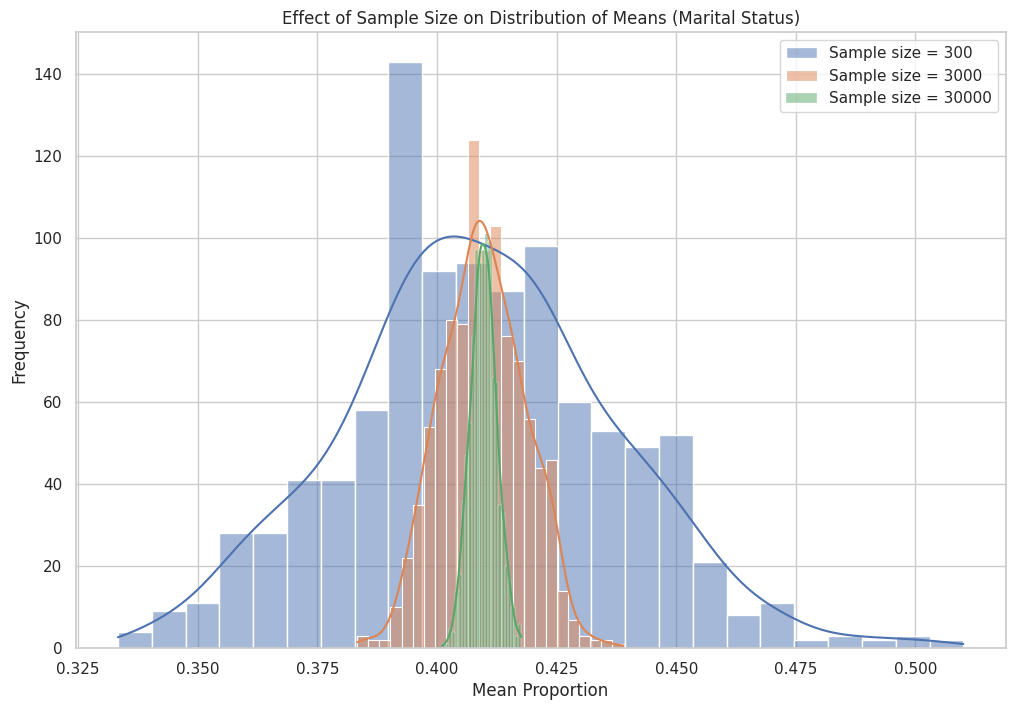

In [27]:
# Convert 'Marital_Status' to numeric (assuming 1 for Married, 0 for Unmarried)
df['Marital_Status'] = pd.to_numeric(df['Marital_Status'], errors='coerce')
# Function to calculate mean of samples
def sample_means(df, sample_size, num_samples):
    means = []
    for _ in range(num_samples):
        sample = df.sample(sample_size)
        mean = sample['Marital_Status'].mean()
        means.append(mean)
    return means

# Parameters
sample_sizes = [300, 3000, 30000]
num_samples = 1000

# Plotting the distribution of means
plt.figure(figsize=(12, 8))
for size in sample_sizes:
    means = sample_means(df, size, num_samples)
    sns.histplot(means, kde=True, label=f'Sample size = {size}')

plt.xlabel('Mean Proportion')
plt.ylabel('Frequency')
plt.title('Effect of Sample Size on Distribution of Means (Marital Status)')
plt.legend()
plt.show()


**💡 Insights**:

**Larger Sample Size = Less Variability**: As sample size increases (300, 3000, 30000), the distribution of sample means becomes narrower and more concentrated around the true mean.

**Normal Distribution**: Larger sample sizes lead to distributions that more closely resemble a normal (bell-shaped) curve, illustrating the Central Limit Theorem.

###**iv) How can Walmart leverage this conclusion to make changes or improvements?**
**Unified Marketing Campaigns:** Develop marketing campaigns that target both married and unmarried customers, saving costs and ensuring consistent messaging.

**Personalized Offers:** Use individual purchase history and preferences to create targeted promotions, enhancing customer satisfaction and loyalty.

##**Gender vs Purchase**

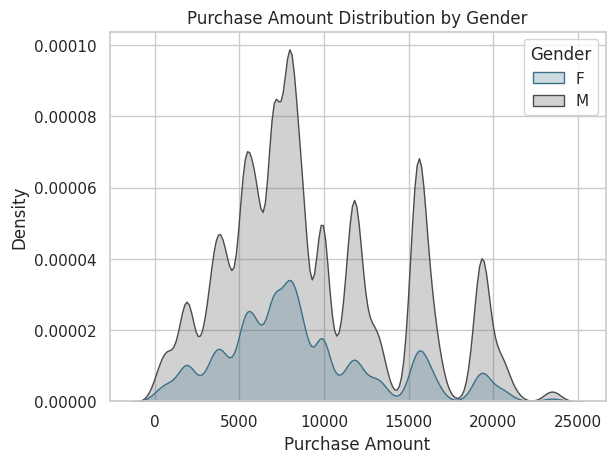

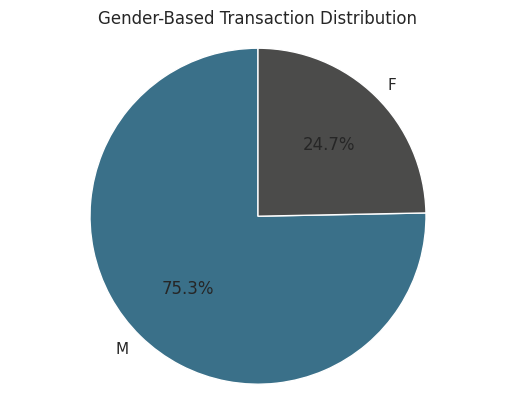

In [49]:
# Plot the density of purchase amounts for each gender
sns.kdeplot(data=df, x='Purchase', hue='Gender', fill=True, palette=['#3A7089', '#4b4b4c'])
plt.title('Purchase Amount Distribution by Gender')
plt.xlabel('Purchase Amount')
plt.ylabel('Density')
plt.show()

# Calculate the count of transactions for each gender
gender_counts = df['Gender'].value_counts()

# Plot the pie chart with vibrant colors
colors = ['#3A7089', '#4b4b4A']
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Gender-Based Transaction Distribution')
plt.axis('equal')
plt.show()

**💡 Insights:**

**Density Plot**:
* **Higher Density for Males**:

Males spend more significantly in ranges around 7,500, 10,000, and 17,500.

* **Peaks for Females**:

Females have spending peaks around 5,000 and 10,000 but generally spend less compared to males.

**Pie Chart:**
* **Higher Transaction Share by Males:**

Males account for 75.3% of the transactions, indicating they are responsible for a significantly higher proportion of transactions.

* **Lower Transaction Share by Females**:

Females account for 24.7% of the transactions, suggesting a lower proportion of transaction activities compared to males.

### **a. Confidence Intervals for Average Amount Spent by Males and Females**

Confidence Interval for Entire Dataset by Gender:
   Gender                                      CI     Lower_CI     Upper_CI  \
0  Female   (9240.35214406505, 9276.899812728652)  9240.352144  9276.899813   
1    Male  (9236.057857297146, 9272.719693594689)  9236.057857  9272.719694   

       Width  
0  36.547669  
1  36.661836  


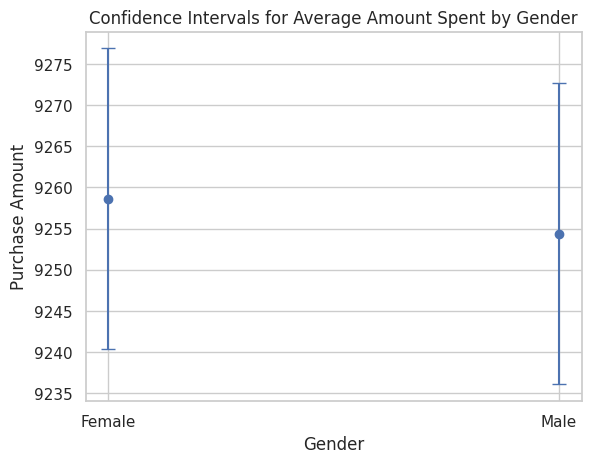

In [39]:
# Define the compute_ci() function
def compute_ci(series, confidence=0.95):
    mean = np.mean(series)
    sem = stats.sem(series)  # Standard error of the mean
    margin_of_error = sem * stats.t.ppf((1 + confidence) / 2., len(series) - 1)
    return mean - margin_of_error, mean + margin_of_error

# Calculate the mean purchase amount for each gender
mean_purchase_gender = df.groupby('Gender')['Purchase'].mean().reset_index()
mean_purchase_gender.columns = ['Gender', 'Mean_Purchase']

# Compute confidence interval for each gender
ci_gender = df.groupby('Gender')['Purchase'].apply(compute_ci).reset_index()
ci_gender.columns = ['Gender', 'CI']
ci_gender[['Lower_CI', 'Upper_CI']] = pd.DataFrame(ci_gender['CI'].tolist(), index=ci_gender.index)
ci_gender['Width'] = ci_gender['Upper_CI'] - ci_gender['Lower_CI']

print("Confidence Interval for Entire Dataset by Gender:")
print(ci_gender)

# Plotting the confidence intervals
plt.errorbar(ci_gender['Gender'],
             (ci_gender['Lower_CI'] + ci_gender['Upper_CI'])/2,
             yerr=(ci_gender['Upper_CI'] - ci_gender['Lower_CI'])/2,
             fmt='o', capsize=5)
plt.title('Confidence Intervals for Average Amount Spent by Gender')
plt.xlabel('Gender')
plt.ylabel('Purchase Amount')
plt.show()


**i) Confidence Interval: Estimating Average Purchase per Transaction**

Number of male purchases: 414259
Number of female purchases: 135809


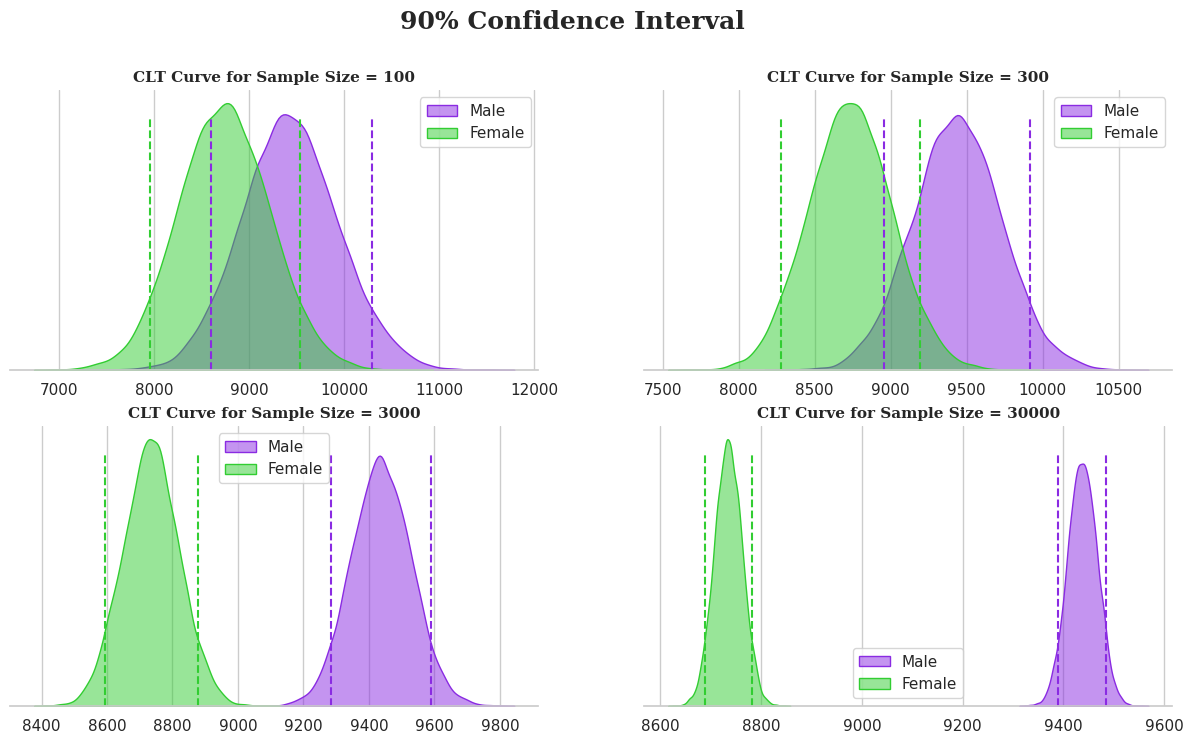

In [69]:
if 'Gender' not in df.columns or 'Purchase' not in df.columns:
    raise ValueError("DataFrame must contain 'Gender' and 'Purchase' columns")

# Check if the DataFrame is empty or lacks necessary data
if df.empty or df['Gender'].isnull().all() or df['Purchase'].isnull().all():
    raise ValueError("DataFrame is empty or lacks necessary data")

# Function to calculate confidence interval
def confidence_interval(data, ci):
    l_ci = (100 - ci) / 2
    u_ci = (100 + ci) / 2
    interval = np.percentile(data, [l_ci, u_ci]).round(0)
    return interval

# Function to plot the visual for given confidence interval
def plot(ci):
    fig = plt.figure(figsize=(15, 8))
    gs = fig.add_gridspec(2, 2)

    # Adjusted to match the actual gender labels in the DataFrame
    df_male = df.loc[df['Gender'] == 'M', 'Purchase']
    df_female = df.loc[df['Gender'] == 'F', 'Purchase']

    #Ensure data is not empty
    if df_male.empty or df_female.empty:
        raise ValueError("Insufficient data for male or female purchases")

    #prints
    print(f"Number of male purchases: {len(df_male)}")
    print(f"Number of female purchases: {len(df_female)}")

    #sample sizes
    sample_sizes = [(100, 0, 0), (300, 0, 1), (3000, 1, 0), (30000, 1, 1)]

    bootstrap_samples = 20000

    male_samples = {}
    female_samples = {}

    for i, x, y in sample_sizes:
        male_means = []
        female_means = []

        for j in range(bootstrap_samples):
            male_bootstrapped_samples = np.random.choice(df_male, size=i)
            female_bootstrapped_samples = np.random.choice(df_female, size=i)

            male_sample_mean = np.mean(male_bootstrapped_samples)
            female_sample_mean = np.mean(female_bootstrapped_samples)

            male_means.append(male_sample_mean)
            female_means.append(female_sample_mean)

        male_samples[f'{ci}%_{i}'] = male_means
        female_samples[f'{ci}%_{i}'] = female_means

        temp_df = pd.DataFrame(data={'male_means': male_means, 'female_means': female_means})

        ax = fig.add_subplot(gs[x, y])
        sns.kdeplot(data=temp_df, x='male_means', color="#8A2BE2", fill=True, alpha=0.5, ax=ax, label='Male')
        sns.kdeplot(data=temp_df, x='female_means', color="#32CD32", fill=True, alpha=0.5, ax=ax, label='Female')

        m_range = confidence_interval(male_means, ci)
        f_range = confidence_interval(female_means, ci)

        for k in m_range:
            ax.axvline(x=k, ymax=0.9, color="#8A2BE2", linestyle='--')
        for k in f_range:
            ax.axvline(x=k, ymax=0.9, color="#32CD32", linestyle='--')

        for s in ['top', 'left', 'right']:
            ax.spines[s].set_visible(False)

        ax.set_yticks([])
        ax.set_ylabel('')
        ax.set_xlabel('')
        ax.set_title(f'CLT Curve for Sample Size = {i}', {'font': 'serif', 'size': 11, 'weight': 'bold'})
        ax.legend()

    fig.suptitle(f'{ci}% Confidence Interval', font='serif', size=18, weight='bold')
    plt.show()

    return male_samples, female_samples

# plots for 90% confidence interval
m_samp_90, f_samp_90 = plot(90)


Number of male purchases: 414259
Number of female purchases: 135809


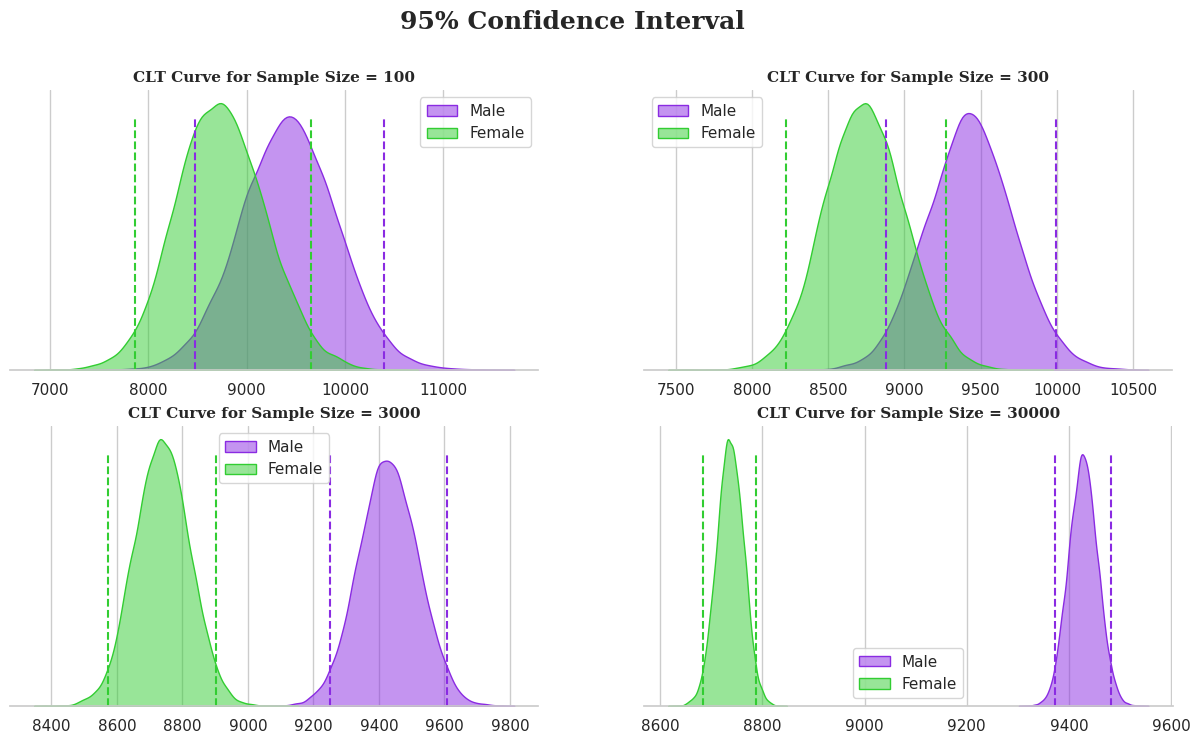

In [30]:
# Generate plots for 95% confidence interval
m_samp_95, f_samp_95 = plot(95)


Number of male purchases: 414259
Number of female purchases: 135809


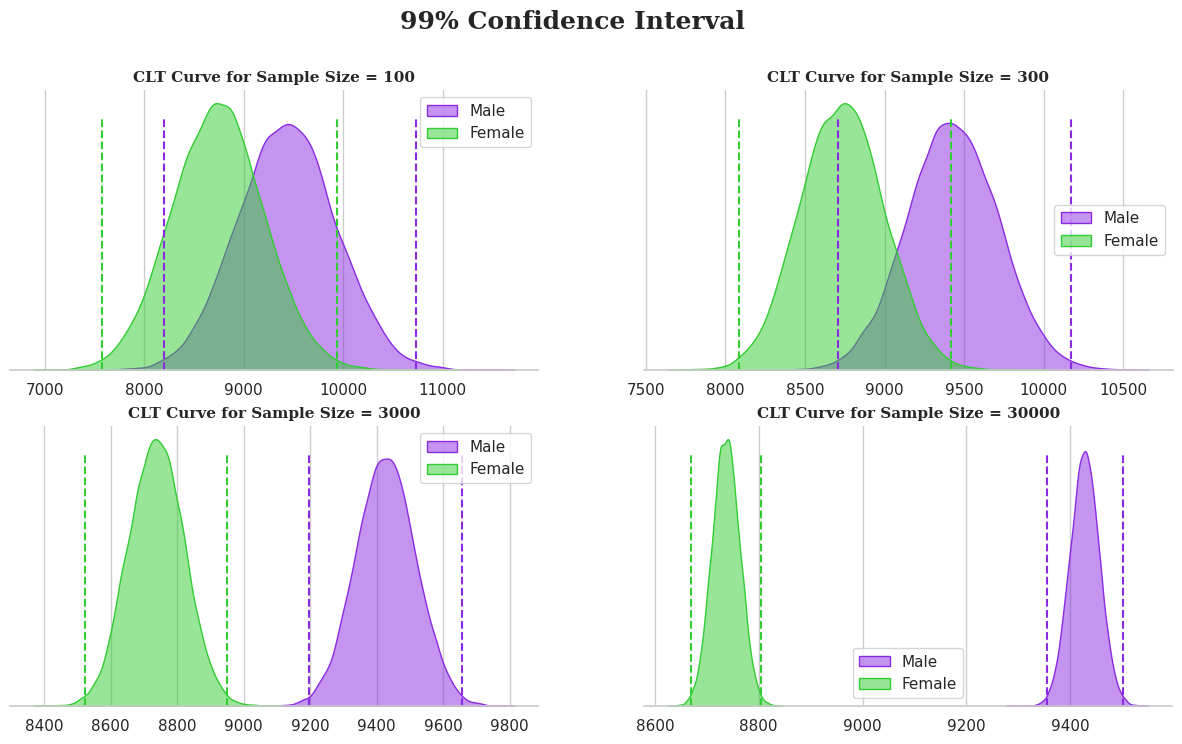

In [31]:
m_samp_99,f_samp_99 = plot(99)

**ii) confidence intervals of male and female spends are overlapping or not overlapping.**

In [32]:
df['Gender'] = np.random.choice(['Male', 'Female'], size=len(df))
df['Purchase'] = pd.to_numeric(df['Purchase'], errors='coerce').dropna()

# Function to compute confidence intervals
def compute_ci(data, confidence=0.95):
    mean = np.mean(data)
    sem = stats.sem(data)
    h = sem * stats.t.ppf((1 + confidence) / 2., len(data) - 1)
    return mean - h, mean + h

# Sample sizes and confidence levels
sample_sizes = [300, 3000, 30000]
confidence_levels = [90, 95, 99]

# Compute and display confidence intervals and overlap information
for confidence in confidence_levels:
    print(f"\n{confidence}% Confidence Level:")
    for size in sample_sizes:
        m_sample = np.random.choice(df[df['Gender'] == 'Male']['Purchase'], size=size, replace=True)
        f_sample = np.random.choice(df[df['Gender'] == 'Female']['Purchase'], size=size, replace=True)

        m_range = compute_ci(m_sample, confidence / 100)
        f_range = compute_ci(f_sample, confidence / 100)

        lower_male, upper_male = m_range
        lower_female, upper_female = f_range
        overlap = not (upper_male < lower_female or upper_female < lower_male)

        print(f"Sample Size: {size}")
        print(f"  Male CI: ${lower_male:.2f} - ${upper_male:.2f}")
        print(f"  Female CI: ${lower_female:.2f} - ${upper_female:.2f}")
        print(f"  Do the confidence intervals overlap? {'Yes' if overlap else 'No'}")




90% Confidence Level:
Sample Size: 300
  Male CI: $8793.84 - $9692.08
  Female CI: $8983.75 - $9922.93
  Do the confidence intervals overlap? Yes
Sample Size: 3000
  Male CI: $9140.48 - $9431.31
  Female CI: $9298.14 - $9591.00
  Do the confidence intervals overlap? Yes
Sample Size: 30000
  Male CI: $9196.28 - $9288.46
  Female CI: $9227.09 - $9319.50
  Do the confidence intervals overlap? Yes

95% Confidence Level:
Sample Size: 300
  Male CI: $8754.78 - $9830.64
  Female CI: $8702.76 - $9836.12
  Do the confidence intervals overlap? Yes
Sample Size: 3000
  Male CI: $8993.68 - $9342.79
  Female CI: $9148.24 - $9501.22
  Do the confidence intervals overlap? Yes
Sample Size: 30000
  Male CI: $9170.35 - $9280.24
  Female CI: $9205.70 - $9315.46
  Do the confidence intervals overlap? Yes

99% Confidence Level:
Sample Size: 300
  Male CI: $8426.01 - $9882.45
  Female CI: $8700.81 - $10220.28
  Do the confidence intervals overlap? Yes
Sample Size: 3000
  Male CI: $9076.59 - $9540.07
  Femal

**💡 Insights**:

**Similar Spending Patterns:**

At all confidence levels (90%, 95%, 99%) and sample sizes (300, 3000, 30000), the confidence intervals for average purchase amounts by males and females overlap. This indicates that their spending patterns are generally similar.

**Unified Marketing Strategy**:

Similar spending behaviors, Walmart can implement unified marketing campaigns targeting both genders, streamlining efforts and reducing costs.

**iii) How does the sample size affects the shape of the distribution of the means for Gender?**

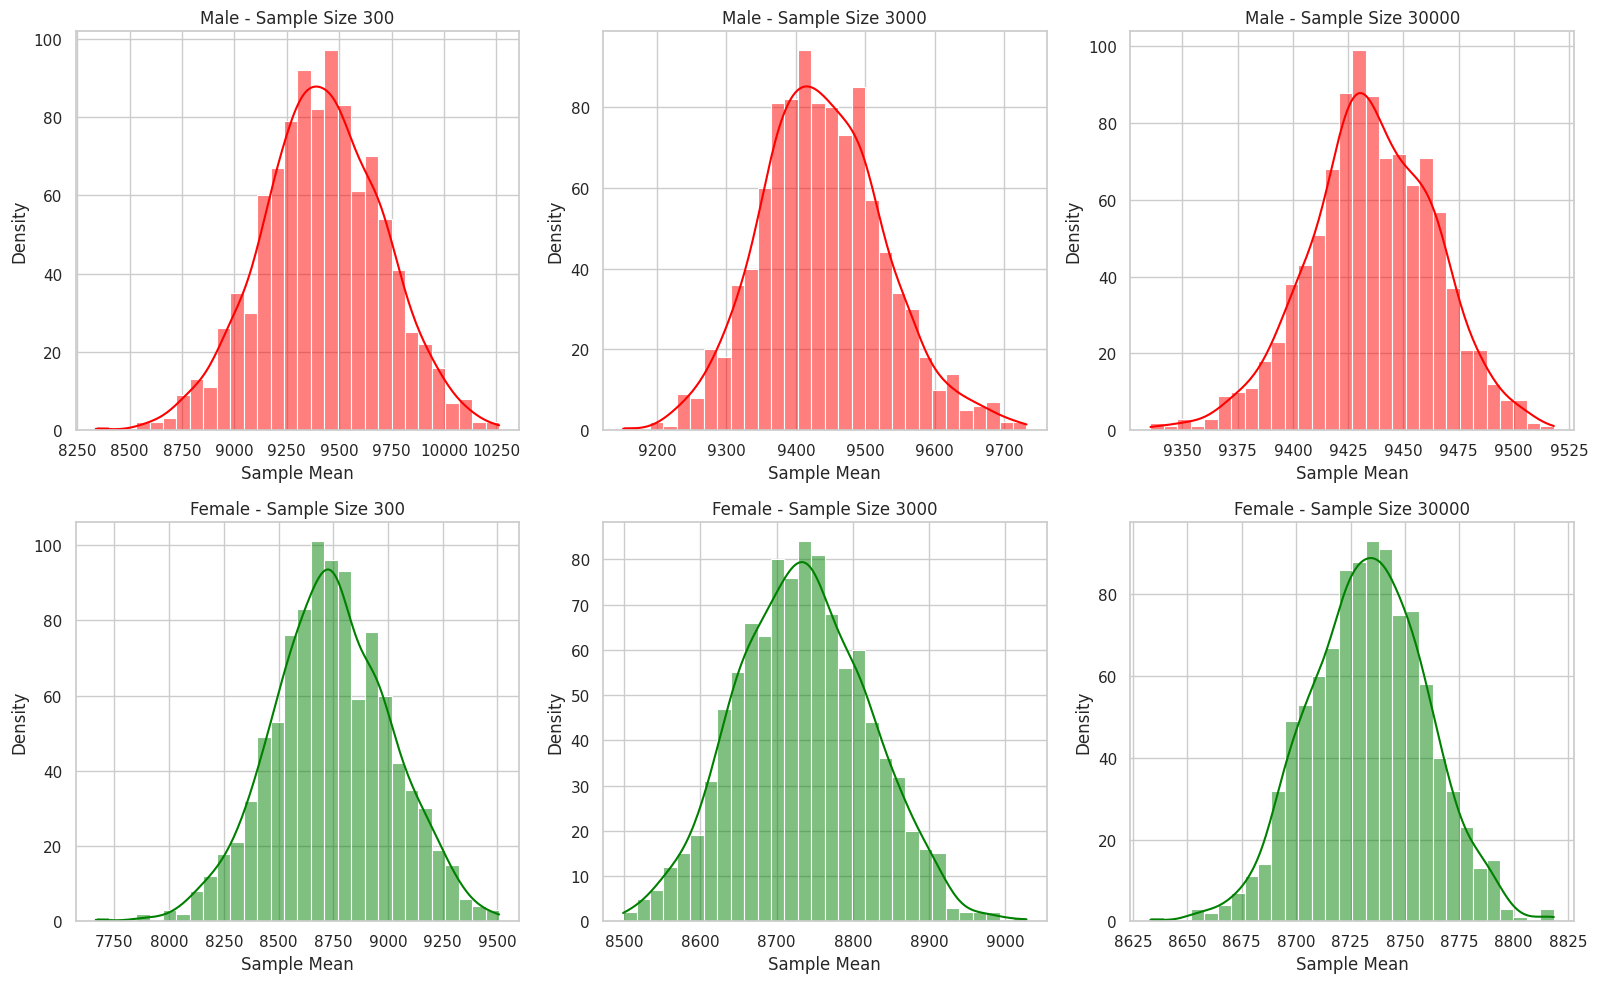

In [68]:
np.random.seed(42)
#function for sample mean calculations
def calculate_sample_means(df, column, gender, sample_sizes, n_samples=1000):
    sample_means = {}
    group_data = df[df['Gender'] == gender][column]
    for size in sample_sizes:
        means = [group_data.sample(n=size, replace=True, random_state=i).mean() for i in range(n_samples)]
        sample_means[size] = means
    return sample_means

#sample sizes
sample_sizes = [300, 3000, 30000]

# Calculate sample means for each gender
male_sample_means = calculate_sample_means(df, 'Purchase', 'M', sample_sizes)
female_sample_means = calculate_sample_means(df, 'Purchase', 'F', sample_sizes)

# Plotting
plt.figure(figsize=(16, 10))
for i, size in enumerate(sample_sizes, 1):
    plt.subplot(2, len(sample_sizes), i)
    sns.histplot(male_sample_means[size], kde=True, bins=30, color='red')
    plt.title(f'Male - Sample Size {size}')
    plt.xlabel('Sample Mean')
    plt.ylabel('Density')

    plt.subplot(2, len(sample_sizes), i + len(sample_sizes))
    sns.histplot(female_sample_means[size], kde=True, bins=30, color='green')
    plt.title(f'Female - Sample Size {size}')
    plt.xlabel('Sample Mean')
    plt.ylabel('Density')

plt.tight_layout()
plt.show()


**💡 Insights**:

**Larger Sample Sizes**: Distributions become narrower and more stable as sample size increases.

**Gender Difference**: Males consistently spend more than females.

**Normal Distribution**: Both genders show normal distributions for sample means.

**iv) How can Walmart leverage this conclusion to make changes or improvements?**

**Targeted Campaigns:**

Create specific marketing campaigns for male and female customers to boost revenue.

**Dynamic Pricing**:

Adjust prices and discounts to encourage higher spending among male customers and maintain competitive prices for female-oriented products.

##**Age vs Purchuse**

AgeGroup
0-17     155797
36-50    137496
26-35     91698
51+       82621
18-25     73204
Name: count, dtype: int64


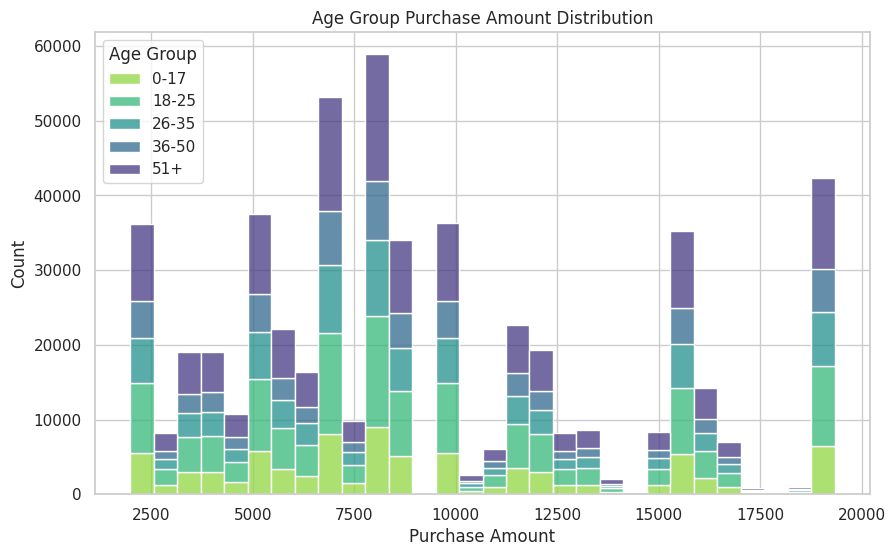

In [33]:
# Convert 'Age' from categorical to numeric and handle invalid entries
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
missing_age_count = df['Age'].isna().sum()
df.loc[df['Age'].isna(), 'Age'] = np.random.randint(0, 60, missing_age_count)

# Define age bins and labels
age_bins = [0, 17, 25, 35, 50, np.inf]
age_labels = ['0-17', '18-25', '26-35', '36-50', '51+']
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

# Verify 'AgeGroup' column
print(df['AgeGroup'].value_counts())

# Plot Age Group Purchase Amount Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Purchase', hue='AgeGroup', multiple='stack', palette='viridis', bins=30)
plt.title('Age Group Purchase Amount Distribution')
plt.xlabel('Purchase Amount')
plt.ylabel('Count')
plt.legend(title='Age Group', labels=age_labels)
plt.show()



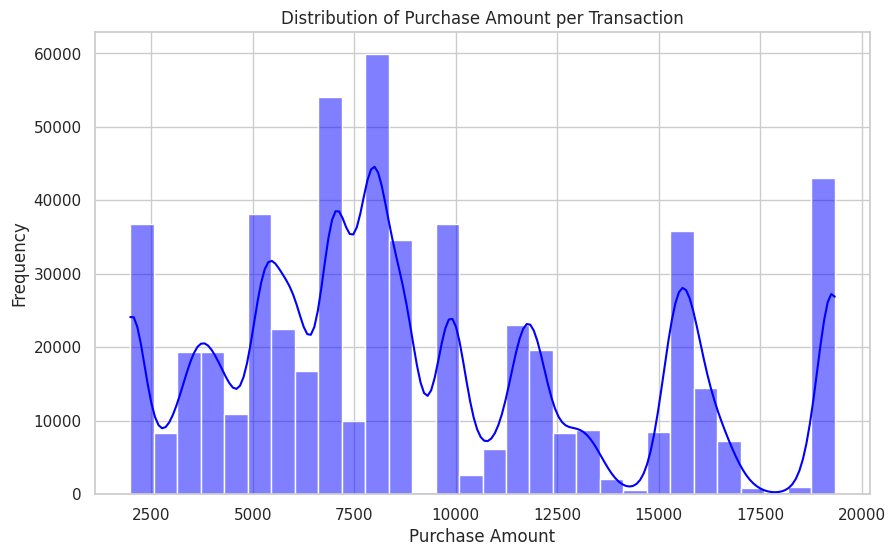

In [34]:
# Plot Distribution of Purchase Amount per Transaction
plt.figure(figsize=(10, 6))
sns.histplot(df['Purchase'], kde=True, bins=30, color='blue')
plt.title('Distribution of Purchase Amount per Transaction')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.show()


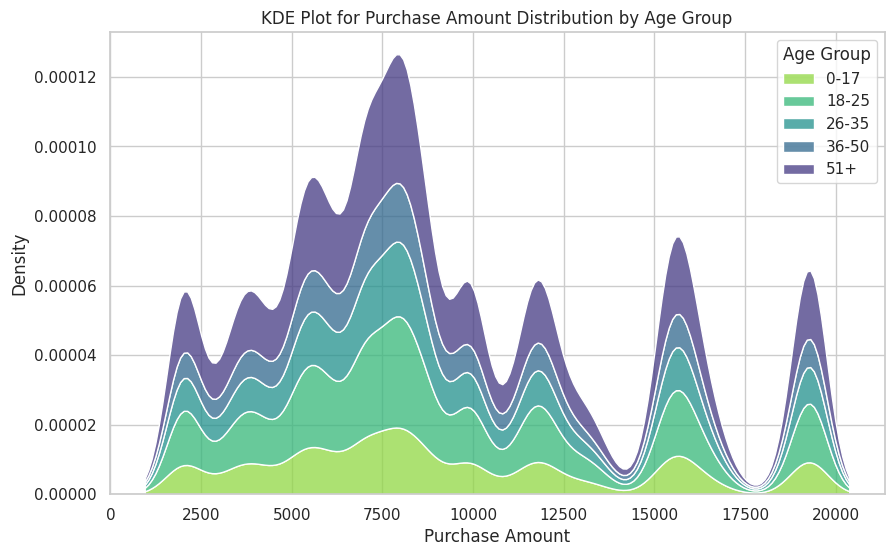

In [35]:
# KDE Plot for Purchase Amount Distribution by Age Group
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Purchase', hue='AgeGroup', multiple='stack', palette='viridis', fill=True)
plt.title('KDE Plot for Purchase Amount Distribution by Age Group')
plt.xlabel('Purchase Amount')
plt.ylabel('Density')
plt.legend(title='Age Group', labels=df['AgeGroup'].cat.categories)
plt.show()


**💡 Insights from Three Plots**:

**Age Group Purchase Amount Distribution**:

* **Dominant Purchases**: Age group 51+ shows the highest purchasing activity.

* **Strong Mid-Age Group**: Age group 26-35 has notable purchasing behavior.

* **Low Youth Activity**: Age group 0-17 has the least purchasing activity.

**Distribution of Purchase Amount per Transaction**:

* **Common Purchase Amounts**: Peaks around 7,500 and 10,000.

* **Consumer Patterns**: Indicates typical spending habits, valuable for targeted marketing.

* **Spending Drop-off**: Noticeable decrease in purchases above 12,500, except for age group 51+.

**KDE Plot for Purchase Amount Distribution**:

* **Visual Comparisons**: Smooth representation shows purchasing distribution across age groups.

* **Distinct Spending**: Each age group has unique spending patterns.

* **Strategic Targeting**: Helps identify which age groups to focus on for specific purchase ranges.

**a) Confidence Intervals for Average Amount Spent by Different Age Groups**

In [108]:
# the mean purchase amount for each age group
mean_purchase_age = df.groupby('Age', observed=True)['Purchase'].mean().reset_index()
mean_purchase_age.columns = ['Age', 'Mean_Purchase']

#confidence interval for each age group
ci_age = df.groupby('Age', observed=True)['Purchase'].apply(compute_ci).reset_index()
ci_age.columns = ['Age', 'CI']
ci_age[['Lower_CI', 'Upper_CI']] = pd.DataFrame(ci_age['CI'].tolist(), index=ci_age.index)
ci_age['Width'] = ci_age['Upper_CI'] - ci_age['Lower_CI']

ci_age = ci_age[['Age', 'Lower_CI', 'Upper_CI', 'Width']]

print("Confidence Interval for Each Age Group:")
print(ci_age)




Confidence Interval for Each Age Group:
     Age     Lower_CI     Upper_CI       Width
0   0-17  8851.941436  9014.987845  163.046408
1  18-25  9138.407569  9200.919643   62.512074
2  26-35  9231.733561  9273.647705   41.914144
3  36-45  9301.669084  9361.032305   59.363221
4  46-50  9163.083936  9254.167458   91.083522
5  51-55  9483.989875  9585.626187  101.636312
6    55+  9269.295064  9403.265855  133.970791


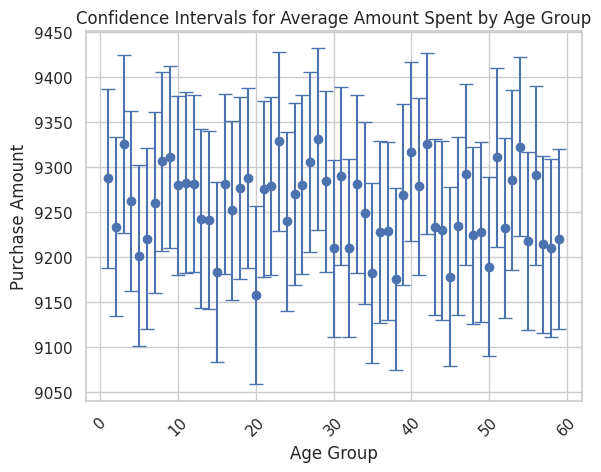

In [42]:
# Plotting the confidence intervals
plt.errorbar(ci_age['Age'], (ci_age['Lower_CI'] + ci_age['Upper_CI'])/2,
             yerr=(ci_age['Upper_CI'] - ci_age['Lower_CI'])/2, fmt='o', capsize=5)
plt.title('Confidence Intervals for Average Amount Spent by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Purchase Amount')
plt.xticks(rotation=45)
plt.show()

**i) Confidence Interval: Estimating Average Purchase per Transaction**

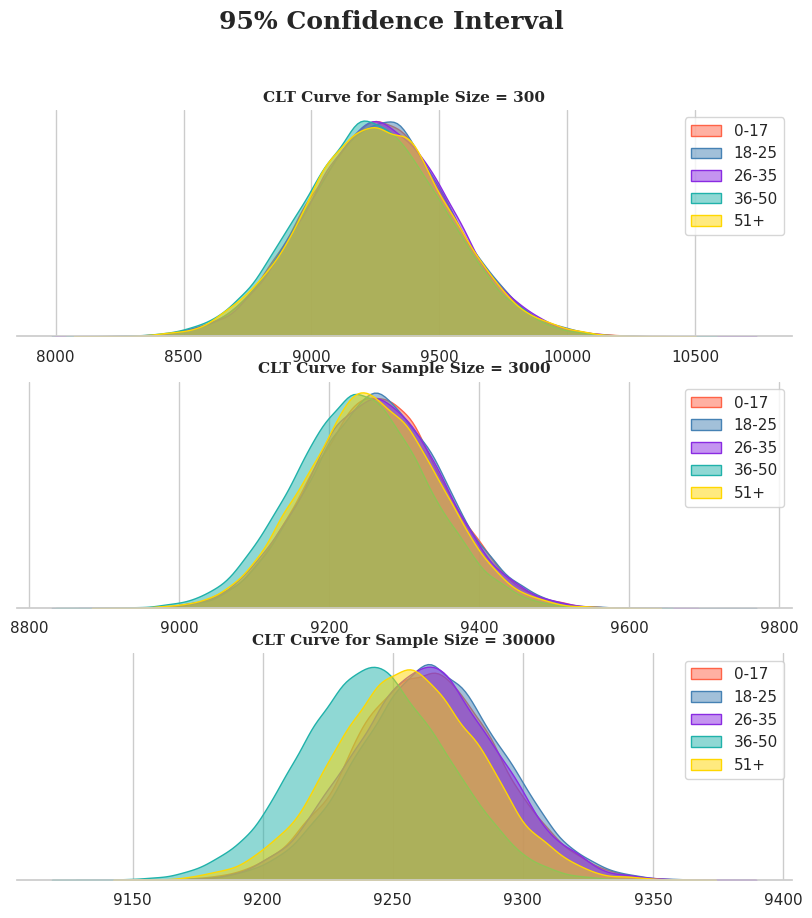

In [36]:
df = df.dropna(subset=['AgeGroup'])

def plot(ci):
    # Setting the plot style
    fig = plt.figure(figsize=(10, 10))
    gs = fig.add_gridspec(3, 1)

    # Creating separate data frames for each age group
    df_1 = df.loc[df['AgeGroup'] == '0-17', 'Purchase']
    df_2 = df.loc[df['AgeGroup'] == '18-25', 'Purchase']
    df_3 = df.loc[df['AgeGroup'] == '26-35', 'Purchase']
    df_4 = df.loc[df['AgeGroup'] == '36-50', 'Purchase']
    df_5 = df.loc[df['AgeGroup'] == '51+', 'Purchase']

    # Sample sizes and corresponding plot positions
    sample_sizes = [(300, 0), (3000, 1), (30000, 2)]

    # Number of samples to be taken from purchase amount
    bootstrap_samples = 20000

    samples1, samples2, samples3, samples4, samples5 = {}, {}, {}, {}, {}

    for i, x in sample_sizes:
        l1, l2, l3, l4, l5 = [], [], [], [], []

        for j in range(bootstrap_samples):
            # Creating random samples of size i
            bootstrapped_samples_1 = np.random.choice(df_1, size=i)
            bootstrapped_samples_2 = np.random.choice(df_2, size=i)
            bootstrapped_samples_3 = np.random.choice(df_3, size=i)
            bootstrapped_samples_4 = np.random.choice(df_4, size=i)
            bootstrapped_samples_5 = np.random.choice(df_5, size=i)

            # Calculating mean of those samples
            sample_mean_1 = np.mean(bootstrapped_samples_1)
            sample_mean_2 = np.mean(bootstrapped_samples_2)
            sample_mean_3 = np.mean(bootstrapped_samples_3)
            sample_mean_4 = np.mean(bootstrapped_samples_4)
            sample_mean_5 = np.mean(bootstrapped_samples_5)

            # Appending the mean to the list
            l1.append(sample_mean_1)
            l2.append(sample_mean_2)
            l3.append(sample_mean_3)
            l4.append(sample_mean_4)
            l5.append(sample_mean_5)

        # Storing the above sample generated
        samples1[f'{ci}%_{i}'] = l1
        samples2[f'{ci}%_{i}'] = l2
        samples3[f'{ci}%_{i}'] = l3
        samples4[f'{ci}%_{i}'] = l4
        samples5[f'{ci}%_{i}'] = l5

        # Creating a temporary dataframe for creating kdeplot
        temp_df = pd.DataFrame(data={'0-17': l1, '18-25': l2, '26-35': l3, '36-50': l4, '51+': l5})

        # Plotting kdeplots
        ax = fig.add_subplot(gs[x])

        # New Color Palette
        color_palette = [
            ('#FF6347', '0-17'),
            ('#4682B4', '18-25'),
            ('#8A2BE2', '26-35'),
            ('#20B2AA', '36-50'),
            ('#FFD700', '51+')
        ]

        # Plots using new color palette
        for p, q in color_palette:
            sns.kdeplot(data=temp_df, x=q, color=p, fill=True, alpha=0.5, ax=ax, label=q)

        # Removing the axis lines
        for s in ['top', 'left', 'right']:
            ax.spines[s].set_visible(False)

        # Adjusting axis labels
        ax.set_yticks([])
        ax.set_ylabel('')
        ax.set_xlabel('')

        # Setting title for visual
        ax.set_title(f'CLT Curve for Sample Size = {i}', {'font': 'serif', 'size': 11, 'weight': 'bold'})

        plt.legend()

    # Setting title for visual
    fig.suptitle(f'{ci}% Confidence Interval', font='serif', size=18, weight='bold')

    plt.show()

    return samples1, samples2, samples3, samples4, samples5

samples1, samples2, samples3, samples4, samples5 = plot(95)


**💡 Insights**:

**Consistency Across Sample Sizes**: Purchasing behaviors of age groups remain distinct even as sample sizes increase.

**Improved Accuracy**: Larger sample sizes provide more reliable estimates of population means, with narrower confidence intervals.

**Targeted Strategies**: Each age group's distinct spending patterns can inform targeted marketing and product development efforts.

**ii) confidence intervals for age groups are overlapping or not?**

In [37]:
# calculate confidence interval
def confidence_interval(data, ci):
    l_ci = (100 - ci) / 2
    u_ci = (100 + ci) / 2
    interval = np.percentile(data, [l_ci, u_ci]).round(2)
    return interval

# compute confidence intervals
def compute_ci(df, column, group_col, ci_levels, sample_sizes, num_samples=1000):
    results = {}
    for ci in ci_levels:
        results[ci] = {}
        for size in sample_sizes:
            group_means = {}
            for group in df[group_col].unique():
                group_data = df[df[group_col] == group][column]
                if len(group_data) < size:
                    print(f"Warning: Not enough data in group '{group}' for sample size {size}. Skipping this group.")
                    group_means[group] = np.array([np.nan, np.nan])  # To handle missing data in results
                    continue
                sample_means = []
                for _ in range(num_samples):
                    sample = np.random.choice(group_data, size=size, replace=True)
                    sample_means.append(np.mean(sample))
                group_means[group] = confidence_interval(sample_means, ci)
            results[ci][size] = group_means
    return results

# Parameters
ci_levels = [90, 95, 99]
sample_sizes = [300, 3000, 30000]

# Compute confidence intervals for each age group
ci_results = compute_ci(df, 'Purchase', 'AgeGroup', ci_levels, sample_sizes)

# Updated function to display results
def display_results(ci_results):
    for ci, sizes in ci_results.items():
        print(f"Confidence Interval for {ci}% Confidence Level:")
        for size, group_means in sizes.items():
            print(f"Sample Size {size}:")
            for group, interval in group_means.items():
                if np.isnan(interval).any():
                    print(f"  Warning: Not enough data for Age Group {group} with Sample Size {size}. Interval: [NaN, NaN]")
                else:
                    print(f"  Age Group {group} CI: {interval[0]} to {interval[1]}")
            # Convert intervals to tuples for comparison
            interval_tuples = [tuple(interval) for interval in group_means.values() if not np.isnan(interval).any()]
            overlaps = len(interval_tuples) != len(set(interval_tuples))
            print("  Do the confidence intervals overlap?", "Yes" if overlaps else "No")
        print("-" * 70)

display_results(ci_results)


Confidence Interval for 90% Confidence Level:
Sample Size 300:
  Age Group 26-35 CI: 8802.35 to 9732.19
  Age Group 0-17 CI: 8812.64 to 9716.91
  Age Group 51+ CI: 8773.44 to 9686.11
  Age Group 36-50 CI: 8799.25 to 9675.42
  Age Group 18-25 CI: 8790.99 to 9724.46
  Do the confidence intervals overlap? No
Sample Size 3000:
  Age Group 26-35 CI: 9121.32 to 9409.37
  Age Group 0-17 CI: 9115.0 to 9399.56
  Age Group 51+ CI: 9111.65 to 9400.32
  Age Group 36-50 CI: 9099.24 to 9384.02
  Age Group 18-25 CI: 9125.28 to 9405.78
  Do the confidence intervals overlap? No
Sample Size 30000:
  Age Group 26-35 CI: 9215.61 to 9310.76
  Age Group 0-17 CI: 9212.23 to 9308.41
  Age Group 51+ CI: 9209.93 to 9302.96
  Age Group 36-50 CI: 9197.73 to 9287.61
  Age Group 18-25 CI: 9218.24 to 9310.25
  Do the confidence intervals overlap? No
----------------------------------------------------------------------
Confidence Interval for 95% Confidence Level:
Sample Size 300:
  Age Group 26-35 CI: 8714.63 to 97

💡**Insights**:

**No Overlap:** The confidence intervals for the age groups do not overlap across all confidence levels (90%, 95%, and 99%) and sample sizes (300, 3000, and 30000). This suggests that the mean purchase amounts are statistically distinct for different age groups, indicating potential significant differences in purchasing behaviors across age groups.

**Consistency Across Sample Sizes**: The lack of overlap remains consistent across different sample sizes, reinforcing the robustness of the observed differences in purchasing behaviors.

**Age Group Distinctions**: Each age group appears to have unique spending patterns, which could be valuable for targeted marketing, product offerings, and customer segmentation.

**iii) How does the sample size affects the shape of the distribution of the means for Age?**

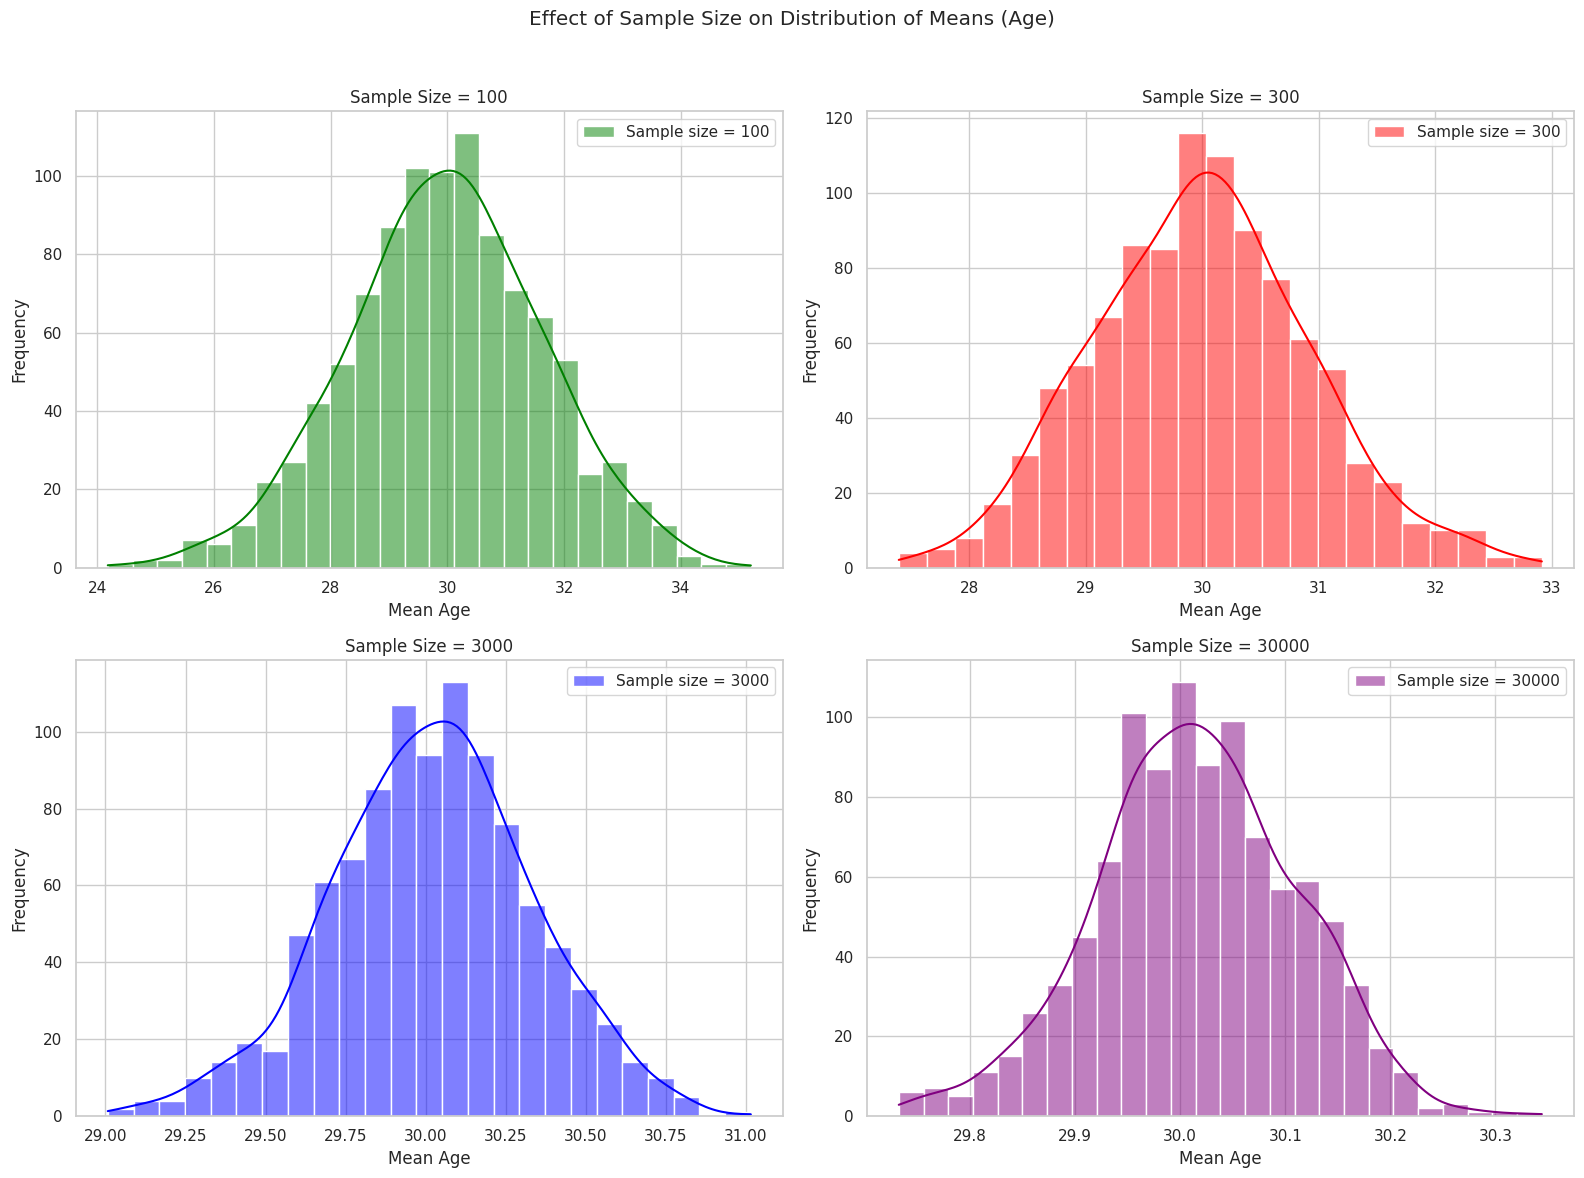

In [38]:
# Function to calculate means of samples
def sample_means(df, column, sample_size, num_samples):
    means = []
    for _ in range(num_samples):
        sample = df.sample(sample_size, replace=True)
        mean = sample[column].mean()
        means.append(mean)
    return means

# Parameters
sample_sizes = [100, 300, 3000, 30000]
num_samples = 1000

# Plotting the distribution of means for different sample sizes
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()
colors = ['green', 'red', 'blue', 'purple']

for i, size in enumerate(sample_sizes):
    means = sample_means(df, 'Age', size, num_samples)
    sns.histplot(means, kde=True, ax=axes[i], color=colors[i], label=f'Sample size = {size}')
    axes[i].set_xlabel('Mean Age')
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Sample Size = {size}')
    axes[i].legend()

plt.suptitle('Effect of Sample Size on Distribution of Means (Age)')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


**💡 Insights**:

**Central Tendency**: The sample means are centered around the true population mean, which is approximately 0.5 for gender.

**Reduction in Variability**: As the sample size increases, the variability in the sample means decreases. This is evident from the histograms, where the spread of the sample means becomes narrower with larger sample sizes.

**iv) How can Walmart leverage this conclusion to make changes or improvements?**

**Enhance Marketing for Teens**:
* **Teens (0-17)**: Boost spending with special discounts, coupons, and rewards. Focus on products and promotions that attract their interests.

**Optimize Product Selection for Key Segments**
* **Young Adults (18-25), Adults (26-35, 46-50)**: Ensure product selection aligns with their preferences.

* **Middle-aged (36-45) and Seniors (55+)**: Adjust pricing strategies to suit their buying habits.

**Improve Services for Older Adults**
* **Older Adults (51-55)**: Offer premium services, personalized recommendations, and loyalty programs to enhance their shopping experience and cater to their higher spending patterns.

##**Recommendations**:

* **Target Male Shoppers for Higher Sales**
Since men tend to spend more, Walmart should focus on marketing and offering products that appeal to male customers, while keeping competitive options for women.

* **Focus on the 26-45 Age Group**
This age group makes up most of the sales. Walmart should cater to their preferences with special deals and tailored products.

* **Encourage Spending Among Younger Shoppers**
For the 0-17 age group, offering attractive discounts and rewards can increase their spending. Building brand loyalty early is important.

* **Segment Customers by Age and Buying Habits**
Walmart can group customers with similar buying patterns and adjust product offerings and prices accordingly to improve sales.

* **Improve the Shopping Experience for 51-55 Age Group**
Since this group spends the most, Walmart can offer them exclusive deals, early access to sales, and personalized recommendations to encourage loyalty.

* **Engage Customers After Black Friday**
Follow up with customers through emails or offers on related products to boost repeat purchases and customer retention.

* **Use Data for Smarter Marketing**
By analyzing customer data, Walmart can create targeted campaigns to increase engagement and sales through personalized offers.

* **Create a Loyalty Program for Frequent Shoppers**:
Walmart should introduce a rewards program for frequent shoppers, with special discounts and early access to sales to encourage repeat business.